# Fine-tuning

## Импорт 

In [1]:
!pip install ruclip==0.0.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 1.1 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 kB 1.6 MB/s eta 0:00:00
  Created wheel for youtokentome: filename=youtokentome-1.0.6-cp310-cp310-linux_x86_64.whl size=187956 sha256=49dda23cd20c2f79ec7c7e5a5a32c67966483d47e53aa62aa763315dc50abf92
  Stored in directory: /root/.cache/pip/wheels/df/85/f8/301d2ba45f43f30bed2fe413efa760bc726b8b660ed9c2900c
Successfully built youtokentome
  Attempting uninstall: more-itertools
    Found existing installation: more-itertools 10.2.0
    Uninstalling more-itertools-10.2.0:
      Successfully uninstalled more-itertools-10.2.0
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.22.2
    Uninstalling huggingface-hub-0.22.2:
      Successfully uninstalled huggingface-hub-0.22.2
ERROR: pip's dependenc

In [2]:
!pip install huggingface-hub==0.19.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.7/311.7 kB 1.5 MB/s eta 0:00:00a 0:00:01m
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.2.1
    Uninstalling huggingface-hub-0.2.1:
      Successfully uninstalled huggingface-hub-0.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ruclip 0.0.2 requires huggingface-hub==0.2.1, but you have huggingface-hub 0.19.4 which is incompatible.


In [3]:
!pip install wandb

In [4]:
import json
from PIL import Image

import torch
import torch.nn as nn
from torch.utils.data import DataLoader

In [5]:
import ruclip

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
clip, processor = ruclip.load('ruclip-vit-base-patch32-384', device=device)

/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:672: FutureWarning: 'cached_download' is the legacy way to download files from the HF hub, please consider upgrading to 'hf_hub_download'
  warnings.warn(


bpe.model:   0%|          | 0.00/748k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/346 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/606M [00:00<?, ?B/s]

In [6]:
device

device(type='cuda')

## Получение данных 

### Подготовка перед отправкой на kaggle 

In [ ]:
# class PreparingDataframe:
#     """
#     Класс для подготовки датафреймов из файлов Parquet.

#     Аргументы:
#     - parquet_urls (list): Список  файлов Parquet для загрузки и обработки.

#     Методы:
#     - preparing(): Выполняет предварительную обработку загруженных датафреймов.
#                    Возвращает кортеж с обработанными датафреймами (test_df, train_df).
#     """

#     def __init__(self, parquet_urls, init_prepare=True):
#         self.parquet_urls = parquet_urls
#         self.dataframes = []

#         # Загружаем файлы Parquet и сохраняем датафреймы в список
#         for url in self.parquet_urls:
#             self.dataframes.append(pd.read_parquet(url))
            
#         if init_prepare:
#             self.prepared_dataframes = self.preparing()
    
#     def preparing(self):
        
#         prepared_dataframes = []

#         for df in self.dataframes:
#             #  пути к файлу
#             df["image_path"] = r"C:/data_for_learning/Horizont ML/full_images/" + df['nm'].astype(str) + '.jpg'
#             # Устанавливаем колонку 'nm' в качестве индекса
#             df.set_index('nm', inplace=True)
            
#             # Удаляем колонку 'price', если она существует
#             if 'price' in df.columns:
#                 df.drop('price', axis=1, inplace=True)
            
#             # Декодируем колонку 'characteristics', если она существует
#             if 'characteristics' in df.columns:
#                 df['characteristics'] = df['characteristics'].apply(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)
            
#             # Определяем колонки для проверки на пропуски
#             columns_to_check = ['title', 'description']
#             if 'characteristics' in df.columns:
#                 columns_to_check.append('characteristics')
            
#             # Удаляем строки с пропусками в указанных колонках
#             df.dropna(subset=columns_to_check, inplace=True)
            
#             # Читаем файл 'monochrome_img.csv'
#             monochrome_df = pd.read_csv('monochrome_img.csv')
            
#             # Извлекаем цифровую часть названий монохромных изображений
#             monochrome_ids = monochrome_df['monochrome_img'].apply(lambda x: x.split('.')[0]).astype(int)
            
#             # Удаляем из датафрейма строки, у которых 'nm' совпадает с цифровой частью названий из 'monochrome_img'
#             df = df[~df.index.isin(monochrome_ids)]
            
            
            
            
#             prepared_dataframes.append(df)
        
#         # Возвращаем кортеж с обработанными датафреймами
#         return tuple(prepared_dataframes)
  
    
    
    
# parquet_urls = [
#     r'C:\data_for_learning\wb_school_test.parquet',
#     r'C:\data_for_learning\wb_school_train.parquet'
# ]

# # Создаем экземпляр класса PreparingDataframe с списком URL-адресов
# preparing_df = PreparingDataframe(parquet_urls)

# # Получаем обработанные датафреймы
# test_df, train_df = preparing_df.prepared_dataframes
# train_df.shape 

### Преобразование изображений для нужного формата RGB 384*384

In [ ]:
# from PIL import Image
# import os
# from tqdm import tqdm
# import cv2

# def load_image(image_path):
#     default_size = (384, 384)  # Размер черного изображения

#     # Если файл существует, загружаем изображение с помощью OpenCV в формате BGR
#     image_bgr = cv2.imread(image_path, cv2.IMREAD_COLOR)

#     if image_bgr is None:
#         # Если OpenCV не смог загрузить изображение, создаем черное изображение
#         black_image = Image.new('RGB', default_size, (0, 0, 0))
#         return black_image



#     # Преобразование numpy массива в PIL Image
#     image_pil = Image.fromarray(image_bgr)

#     # Изменение размера изображения
#     resized_image = image_pil.resize(default_size)

#     return resized_image

# def resize_images(image_paths, output_directory):
#     # Создаем выходную директорию, если она не существует
#     os.makedirs(output_directory, exist_ok=True)

#     # Создаем прогресс-бар
#     progress_bar = tqdm(total=len(image_paths), unit='image')

#     for image_path in image_paths:
#         # Открываем изображение

#         image = load_image(image_path)


#         # Получаем имя файла из пути
#         filename = os.path.basename(image_path)

#         # Формируем путь для сохранения измененного изображения
#         output_path = os.path.join(output_directory, filename)

#         # Сохраняем измененное изображение
#         image.save(output_path)

#         # Обновляем прогресс-бар
#         progress_bar.set_description(f"Processing {filename}")
#         progress_bar.update(1)

#     # Закрываем прогресс-бар
#     progress_bar.close()

#     print("Все изображения обработаны и сохранены.")

In [ ]:
# image_paths = test_df['image_path'].tolist()
# output_directory = r"D:\wb\test_df_384"
# resize_images(image_paths, output_directory)

тут я сохранил 'title' и пути к изображениям. Отправил на kaggle 

### Изменение изображения с охранением оригинального соотношение сторон 

Здесь изменил способ обработки изображения с сохранением оригинального отношения 

In [ ]:
from tqdm import tqdm
import cv2
from PIL import Image
import os

def load_image(image_path, default_size):
    # Если файл существует, загружаем изображение с помощью OpenCV в формате BGR
    image_bgr = cv2.imread(image_path, cv2.IMREAD_COLOR)

    if image_bgr is None:
        # Если OpenCV не смог загрузить изображение, создаем черное изображение
        black_image = Image.new('RGB', default_size, (0, 0, 0))
        return black_image

    # Преобразование numpy массива в PIL Image
    image_pil = Image.fromarray(image_bgr)

    # Изменение размера изображения с сохранением соотношения сторон
    image_pil.thumbnail(default_size)

    return image_pil

def resize_images(image_paths, output_directory, default_size):
    # Создаем выходную директорию, если она не существует
    os.makedirs(output_directory, exist_ok=True)

    # Создаем прогресс-бар
    progress_bar = tqdm(total=len(image_paths), unit='image')

    for image_path in image_paths:
        # Открываем изображение
        image = load_image(image_path, default_size)

        # Получаем имя файла из пути
        filename = os.path.basename(image_path)

        # Формируем путь для сохранения измененного изображения
        output_path = os.path.join(output_directory, filename)

        # Сохраняем измененное изображение
        image.save(output_path)

        # Обновляем прогресс-бар
        progress_bar.set_description(f"Processing {filename}")
        progress_bar.update(1)

    # Закрываем прогресс-бар
    progress_bar.close()

    print("Все изображения обработаны и сохранены.")

### Загрузка данных на kaggle 

In [6]:
import pandas as pd

text = pd.read_csv("/kaggle/input/title-train-df/title_train_df.csv")



def convert_filepaths(df, old_base_path, new_base_path, filepath_column):
    """
    Преобразует пути к файлам в DataFrame.

    Args:
        df (pd.DataFrame): DataFrame, содержащий пути к файлам.
        old_base_path (str): Старый базовый путь, который нужно заменить.
        new_base_path (str): Новый базовый путь.
        filepath_column (str): Название столбца, содержащего пути к файлам.

    Returns:
        pd.DataFrame: DataFrame с преобразованными путями к файлам.
    """

    df[filepath_column] = df[filepath_column].str.replace(old_base_path, new_base_path)
    return df



# Преобразование путей
old_base_path = 'C:/data_for_learning/Horizont ML/full_images/'
new_base_path = '/kaggle/input/wb-images/train_df_384-284/train_df_384-284/'
filepath_column = 'image_path'
title = convert_filepaths(text, old_base_path, new_base_path, filepath_column)


test = pd.read_csv("/kaggle/input/test-wb-text/test_kaggle.csv")
old_base_path = r'C:\data_for_learning\Horizont ML\full_images/'
new_base_path = '/kaggle/input/wb-images/test_df_384-284/test_df_384-284/'
filepath_column = 'image_path'
test  = convert_filepaths(test, old_base_path, new_base_path, filepath_column)

title

,title,image_path
0,Трилогия Метро 2033 Глуховский,/kaggle/input/wb-images/train_df_384-284/train...
1,Детский ксилофон-сортер 0+,/kaggle/input/wb-images/train_df_384-284/train...
2,Бутсы шиповки сороконожки подростковые мужские...,/kaggle/input/wb-images/train_df_384-284/train...
3,Рюкзак кожаный,/kaggle/input/wb-images/train_df_384-284/train...
4,Чешки спортивные,/kaggle/input/wb-images/train_df_384-284/train...
...,...,...
98975,Тактические перчатки военные,/kaggle/input/wb-images/train_df_384-284/train...
98976,Тройник разветвитель для садовых шлангов на 1/...,/kaggle/input/wb-images/train_df_384-284/train...
98977,Дождик Занавес для фотозоны на праздник 2 шт.,/kaggle/input/wb-images/train_df_384-284/train...
98978,Серьги ассиметрия,/kaggle/input/wb-images/train_df_384-284/train...


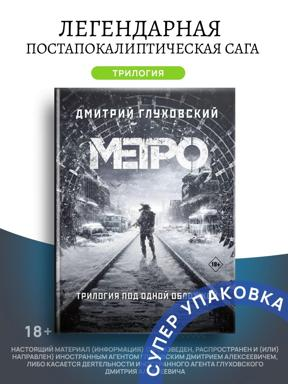

In [7]:
text_list = title['title'].tolist()
image_path = title['image_path'].tolist()
image = Image.open(image_path [0])
text = text_list[0]
image

Создаем класс для DataLoader учитывая особенности кода для ruCLIP

In [8]:
import os
from torch.utils.data import DataLoader
from torchvision.transforms import Compose
from PIL import Image

class ImageTitleDataset:
    def __init__(self, processor, list_image_path, list_txt):
        """
        Класс Dataset для загрузки изображений и соответствующих текстовых описаний.

        Args:
            processor: Обработчик текста (например, токенизатор).
            list_image_path (list): Список путей к изображениям.
            list_txt (list): Список текстовых описаний.
        """
        self.processor = processor
        self.image_path = list_image_path
        self.title = list_txt

    def __len__(self):
        """Возвращает общее количество пар изображение-текст."""
        return len(self.title)

    def __getitem__(self, idx):
        """
        Получает пару изображение-текст по индексу.

        Args:
            idx (int): Индекс пары.

        Returns:
            tuple: Кортеж, содержащий тензор изображения и тензор текста.
        """
        image = Image.open(self.image_path[idx])
        text = self.title[idx]
        data_dict = self.processor(text=text, images=[image])

        # Получаем тензор для изображений
        image = data_dict['pixel_values']
        # Тензор с IDs для текста
        text = data_dict['input_ids']

        return image, text

def collate_fn(batch):
    """
    Функция collate_fn для DataLoader.

    Args:
        batch (list): Список пар изображение-текст.

    Returns:
        tuple: Кортеж, содержащий тензоры изображений и текста.
    """
    images, texts = zip(*batch)
    images = torch.stack(images, dim=0).squeeze(1)
    texts = torch.stack(texts, dim=0).squeeze(1)
    return images, texts

def create_dataloader(processor, list_image_path, list_txt, batch_size, shuffle=True, num_workers=-1):
    """
    Создает DataLoader для набора данных ImageTitleDataset.

    Args:
        processor: Обработчик текста.
        list_image_path (list): Список путей к изображениям.
        list_txt (list): Список текстовых описаний.
        batch_size (int): Размер пакета.
        shuffle (bool, optional): Флаг перемешивания данных. По умолчанию True.
        num_workers (int, optional): Количество рабочих процессов для загрузки данных.
                                     По умолчанию -1, что означает использование всех доступных CPU.

    Returns:
        DataLoader: Объект DataLoader для набора данных.
    """
    dataset = ImageTitleDataset(processor, list_image_path, list_txt)
    
    if num_workers == -1:
        num_workers = os.cpu_count()
    
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers, collate_fn=collate_fn)
    return dataloader


list_image_path = title['image_path'].tolist()
list_txt = title['title'].tolist()
batch_size = 16

# Создаем DataLoader
dataloader = create_dataloader(processor, list_image_path, list_txt, batch_size)


In [49]:
# batch1_images, batch1_texts = next(iter(dataloader))
# # batch1_images = batch1_images.squeeze(1)
# # batch1_texts = batch1_texts.squeeze(1)# Remove the extra dimension
# logits_per_image, logits_per_text = clip.forward(input_ids=batch1_texts, pixel_values=batch1_images)
# logits_per_image, logits_per_text

(tensor([[18.8539,  6.0456],
         [ 6.1315, 21.9013]], grad_fn=<MmBackward0>),
 tensor([[18.8539,  6.1315],
         [ 6.0456, 21.9013]], grad_fn=<TBackward0>))

## Код fine-tuning

In [15]:
# from tqdm import tqdm
# import torch
# import torch.nn as nn
# import torch.optim as optim
# import csv
# from datetime import datetime


# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # Настройка оптимизатора с небольшим weight_decay для регуляризации
# optimizer = optim.Adam(clip.parameters(), lr=1e-5, betas=(0.9, 0.98), eps=1e-6, weight_decay=0.01)
# loss_img = nn.CrossEntropyLoss()
# loss_txt = nn.CrossEntropyLoss()
# clip.train()

# num_epochs = 2

# # Открытие файла для записи логов
# with open('/kaggle/working/training_log_epoch2.csv', mode='w', newline='') as file:
#     writer = csv.writer(file)
#     writer.writerow(["Epoch", "Batch", "Loss", "Time"])  # Заголовки столбцов

#     for epoch in range(num_epochs):
#         pbar = tqdm(dataloader, total=len(dataloader))
#         for i, batch in enumerate(pbar):
#             optimizer.zero_grad()

#             images, texts = batch
#             images = images.to(device)
#             texts = texts.to(device)

#             # Проверка наличия NaN или Inf в данных
#             if torch.isnan(images).any() or torch.isnan(texts).any():
#                 raise ValueError("Data contains NaN values")
#             if torch.isinf(images).any() or torch.isinf(texts).any():
#                 raise ValueError("Data contains inf values")

#             # Forward pass
#             logits_per_image, logits_per_text = clip.forward(input_ids=texts, pixel_values=images)

#             # Compute loss
#             ground_truth = torch.arange(len(images), dtype=torch.long, device=device)
#             total_loss = (loss_img(logits_per_image, ground_truth) + loss_txt(logits_per_text, ground_truth)) / 2

#             if torch.isnan(total_loss).any() or torch.isinf(total_loss).any():
#                 raise ValueError("Loss is NaN or Inf")

#             # Backward pass
#             total_loss.backward()

#             # Проверка на NaN или Inf в градиентах
#             for param in clip.parameters():
#                 if param.grad is not None:
#                     if torch.isnan(param.grad).any() or torch.isinf(param.grad).any():
#                         raise ValueError("Gradients are NaN or Inf")

#             optimizer.step()

#             # Запись логов в файл
#             current_time = datetime.now().strftime("%H:%M:%S")
#             writer.writerow([epoch + 1, i + 1, total_loss.item(), current_time])

#             # Обновление описания для tqdm
#             pbar.set_description(f"Epoch {epoch + 1}/{num_epochs}, Batch {i + 1}/{len(dataloader)}, Loss: {total_loss.item():.4f}, Time: {current_time}")

#         # Сохранение модели и состояния оптимизатора после каждой эпохи
#         torch.save({
#         'model': clip,  # сохраняем сам объект модели
#         'model_state_dict': clip.state_dict()  # сохраняем state_dict модели для гибкости
#         #'optimizer_state_dict': optimizer.state_dict(),  # сохраняем состояние оптимизатора
#         }, '/kaggle/working/ruCLIP_model_and_opt.pth')

Epoch 1/2, Batch 3094/3094, Loss: 0.5097, Time: 10:43:30: 100%|██████████| 3094/3094 [1:02:47<00:00,  1.22s/it]



Epoch 2/2, Batch 3094/3094, Loss: 0.2302, Time: 11:46:15: 100%|██████████| 3094/3094 [1:02:44<00:00,  1.22s/it]


на всякий случай сохраняем состояние оптимизатора 

In [22]:
#   # Сохранение модели и состояния оптимизатора после каждой эпохи
# torch.save({
# 'model': clip,  # сохраняем сам объект модели
# 'model_state_dict': clip.state_dict(),  # сохраняем state_dict модели для гибкости
# 'optimizer_state_dict': optimizer.state_dict(),  # сохраняем состояние оптимизатора
# }, '/kaggle/working/ruCLIP_model_and_opt_2epoch.pth')



Параметры `betas`
Параметр `betas` в Adam определяет коэффициенты экспоненциального скользящего среднего для градиентов и квадратов градиентов. Обычно `betas` задаются как кортеж из двух чисел:
- **Первое число (`beta1`)** обычно около 0.9, отвечает за скорость затухания скользящего среднего градиентов. Это как бы "моментум" в терминах SGD.
- **Второе число (`beta2`)** обычно около 0.999, отвечает за скорость затухания скользящего среднего квадратов градиентов, что помогает стабилизировать изменения весов, особенно когда градиенты малы.

Для нашей задачи значения `beta1=0.9` и `beta2=0.98` могут быть немного агрессивнее в сглаживании квадратов градиентов, что потенциально может привести к более быстрым, но менее стабильным обновлениям, особенно если данные зашумлены или неравномерны.

Параметр `eps`
Параметр `eps` (эпсилон) используется для предотвращения деления на ноль при вычислении скоростей обновления весов (в знаменателе формулы обновления весов). Обычное значение `eps` составляет `1e-8`, но в вашем случае оно установлено как `1e-6`, что делает алгоритм менее чувствительным к очень малым знаменателям и может помочь избежать численных проблем при наличии очень малых градиентов.

Параметр `weight_decay`
`Weight_decay` применяется для регуляризации модели через L2 штраф (как описано выше). Значение `weight_decay` конкретного случая:
- **Большие значения** (`0.01` и выше) могут быть полезны, если модель переобучается (слишком хорошо подгоняется под данные обучающего набора, но плохо работает на новых, не виденных данных).
- **Малые значения** (около `0.001` или меньше) могут быть лучше, если модель и так уже достаточно регуляризована другими методами (например, dropout или batch normalization) или если данные очень шумные.

Рекомендации для вашей задачи
Учитывая, что ruCLIP — это довольно мощная модель с большим количеством параметров, и вы работаете с изображениями и текстами:
- **`betas`**: Рекомендуется начать с стандартных значений `(0.9, 0.999)` и посмотреть, как модель будет себя вести, а затем экспериментировать с более низким `beta2` (например, `0.98`), если изменения весов слишком велики

In [10]:
# from tqdm import tqdm
# import torch
# import torch.nn as nn
# import torch.optim as optim
# import csv
# from datetime import datetime

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # Настройка модели и оптимизатора
# clip.to(device)  # Замените YourCLIPModel на имя вашей модели
# optimizer = optim.Adam(clip.parameters(), lr=1e-6, betas=(0.9, 0.999), eps=1e-6, weight_decay=0.01)
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.5)  # Добавление scheduler

# loss_img = nn.CrossEntropyLoss()
# loss_txt = nn.CrossEntropyLoss()

# num_epochs = 3

# # Логирование параметров обучения
# log_file_path = '/kaggle/working/training_log_epoch2.csv'
# fieldnames = ["Epoch", "Batch", "Loss", "Time", "LR"]  # Добавление поля LR для логирования learning rate

# with open(log_file_path, mode='w', newline='') as file:
#     writer = csv.DictWriter(file, fieldnames=fieldnames)
#     writer.writeheader()

#     for epoch in range(num_epochs):
#         pbar = tqdm(dataloader, total=len(dataloader))  # Убедитесь, что dataloader корректно определен
#         for i, batch in enumerate(pbar):
#             optimizer.zero_grad()

#             images, texts = batch  # Убедитесь, что batch выдает корректные данные
#             images = images.to(device)
#             texts = texts.to(device)

#             # Forward pass
#             logits_per_image, logits_per_text = clip.forward(input_ids=texts, pixel_values=images)

#             # Compute loss
#             ground_truth = torch.arange(images.size(0), device=device)
#             total_loss = (loss_img(logits_per_image, ground_truth) + loss_txt(logits_per_text, ground_truth)) / 2

#             # Backward and optimize
#             total_loss.backward()
#             optimizer.step()
#             scheduler.step()  # Обновление learning rate через scheduler

#             # Logging
#             current_time = datetime.now().strftime("%H:%M:%S")
#             current_lr = scheduler.get_last_lr()[0]
#             writer.writerow({"Epoch": epoch + 1, "Batch": i + 1, "Loss": total_loss.item(), "Time": current_time, "LR": current_lr})

#             # Обновление описания для tqdm
#             pbar.set_description(f"Epoch {epoch + 1}/{num_epochs}, Batch {i + 1}/{len(dataloader)}, Loss: {total_loss.item():.4f}, LR: {current_lr:.6f}, Time: {current_time}")

#         # Сохранение модели и состояния оптимизатора после каждой эпохи
#         torch.save({
#             'epoch': epoch,
#             'model_state_dict': clip.state_dict(),
#             'optimizer_state_dict': optimizer.state_dict()
#             #,'scheduler_state_dict': scheduler.state_dict()
#         }, f'/kaggle/working/ruCLIP_model_epoch{epoch+1}.pth')

Epoch 1/3, Batch 3094/3094, Loss: 0.0005, LR: 0.000000, Time: 09:58:28: 100%|██████████| 3094/3094 [56:11<00:00,  1.09s/it]

Epoch 2/3, Batch 3094/3094, Loss: 0.0000, LR: 0.000000, Time: 10:54:47: 100%|██████████| 3094/3094 [56:15<00:00,  1.09s/it]

Epoch 3/3, Batch 3094/3094, Loss: 0.0009, LR: 0.000000, Time: 11:51:03: 100%|██████████| 3094/3094 [56:14<00:00,  1.09s/it]


### Логированный на 2 эпохи 

In [14]:
import wandb
wandb.login(key="")

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [15]:
# from tqdm import tqdm
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from datetime import datetime
# import wandb


# list_image_path = title['image_path'].tolist()
# list_txt = title['title'].tolist()
# batch_size = 32

# # Создаем DataLoader
# dataloader = create_dataloader(processor, list_image_path, list_txt, batch_size)

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # Вход в систему в wandb и начало эксперимента
# wandb.login()
# run = wandb.init(project="fine-tuning-ruclip", name="2epoch")

# clip.to(device)
# optimizer = optim.Adam(clip.parameters(), lr=1e-6, betas=(0.9, 0.999), eps=1e-6, weight_decay=0.01)
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.5)

# loss_img = nn.CrossEntropyLoss()
# loss_txt = nn.CrossEntropyLoss()

# num_epochs = 2

# for epoch in range(num_epochs):
#     pbar = tqdm(dataloader, total=len(dataloader))
#     for i, batch in enumerate(pbar):
#         optimizer.zero_grad()

#         images, texts = batch
#         images = images.to(device)
#         texts = texts.to(device)

#         logits_per_image, logits_per_text = clip.forward(input_ids=texts, pixel_values=images)

#         ground_truth = torch.arange(images.size(0), device=device)
#         total_loss = (loss_img(logits_per_image, ground_truth) + loss_txt(logits_per_text, ground_truth)) / 2

#         total_loss.backward()
#         optimizer.step()
#         scheduler.step()

#         current_time = datetime.now().strftime("%H:%M:%S")
#         current_lr = scheduler.get_last_lr()[0]

#         # Отслеживание метрик в wandb
#         wandb.log({"Epoch": epoch + 1, "Batch": i + 1, "Loss": total_loss.item(), "Time": current_time, "LR": current_lr,"BS":batch_size})

#         pbar.set_description(f"Epoch {epoch + 1}/{num_epochs}, Batch {i + 1}/{len(dataloader)}, Loss: {total_loss.item():.6f}, LR: {current_lr:.7f}, Time: {current_time}")

#     torch.save({
#         'epoch': epoch,
#         'model_state_dict': clip.state_dict(),
#         'optimizer_state_dict': optimizer.state_dict()
#     }, f'/kaggle/working/ruCLIP_model_epoch{epoch+1}.pth')

# # Завершение эксперимента
# run.finish()

wandb: Currently logged in as: chumachenko-vladislav (wb-project). Use `wandb login --relogin` to force relogin


Epoch 1/2, Batch 3094/3094, Loss: 0.000250, LR: 0.0000000, Time: 19:20:33: 100%|██████████| 3094/3094 [56:14<00:00,  1.09s/it]
Epoch 2/2, Batch 3094/3094, Loss: 0.000599, LR: 0.0000000, Time: 20:16:49: 100%|██████████| 3094/3094 [56:13<00:00,  1.09s/it]


BS,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Batch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▆▇▇██▁▁▂▂▃▃▃▄▄▄▅▅▅▆▆▇▇▇██
Epoch,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁████████████████████
LR,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Loss,█▄▁▄▆▄▄▂▃▃▃▂▂▄▂▁▃█▄▂▄▄▂▄▄▃▃▃▃▆▃▃▆▄▂▂▇▁▂▄
BS,32
Batch,3094
Epoch,2
LR,0.0
Loss,0.0006
Time,20:16:49


### batch16 

In [9]:
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
from datetime import datetime
import wandb


list_image_path = title['image_path'].tolist()
list_txt = title['title'].tolist()
batch_size = 16

# Создаем DataLoader
dataloader = create_dataloader(processor, list_image_path, list_txt, batch_size)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Вход в систему в wandb и начало эксперимента
wandb.login(key='')
run = wandb.init(project="fine-tuning-ruclip", name="batch16")

clip.to(device)
optimizer = optim.Adam(clip.parameters(), lr=1e-6, betas=(0.9, 0.98), eps=1e-8, weight_decay=0.005)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.5)

loss_img = nn.CrossEntropyLoss()
loss_txt = nn.CrossEntropyLoss()

num_epochs = 2

for epoch in range(num_epochs):
    pbar = tqdm(dataloader, total=len(dataloader))
    for i, batch in enumerate(pbar):
        optimizer.zero_grad()

        images, texts = batch
        images = images.to(device)
        texts = texts.to(device)

        logits_per_image, logits_per_text = clip.forward(input_ids=texts, pixel_values=images)

        ground_truth = torch.arange(images.size(0), device=device)
        total_loss = (loss_img(logits_per_image, ground_truth) + loss_txt(logits_per_text, ground_truth)) / 2

        total_loss.backward()
        optimizer.step()
        scheduler.step()

        current_time = datetime.now().strftime("%H:%M:%S")
        current_lr = scheduler.get_last_lr()[0]

        # Отслеживание метрик в wandb
        wandb.log({"Epoch": epoch + 1, "Batch": i + 1, "Loss": total_loss.item(), "Time": current_time, "LR": current_lr,"BS":batch_size})

        pbar.set_description(f"Epoch {epoch + 1}/{num_epochs}, Batch {i + 1}/{len(dataloader)}, Loss: {total_loss.item():.6f}, LR: {current_lr:.7f}, Time: {current_time}")

    torch.save({
        'epoch': epoch,
        'model_state_dict': clip.state_dict(),
        'optimizer_state_dict': optimizer.state_dict()
    }, f'/kaggle/working/ruCLIP_model_epoch{epoch+1}.pth')

# Завершение эксперимента
run.finish()

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: chumachenko-vladislav (wb-project). Use `wandb login --relogin` to force relogin


Epoch 1/2, Batch 6187/6187, Loss: 0.000089, LR: 0.0000000, Time: 15:07:08: 100%|██████████| 6187/6187 [1:02:23<00:00,  1.65it/s]
Epoch 2/2, Batch 6187/6187, Loss: 0.000001, LR: 0.0000000, Time: 16:09:37: 100%|██████████| 6187/6187 [1:02:27<00:00,  1.65it/s]


BS,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Batch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▆▇▇██▁▁▂▂▃▃▃▄▄▄▅▅▅▆▆▇▇▇██
Epoch,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁████████████████████
LR,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Loss,▇▃▁█▄▃▁▂▆▁▂▁▁█▃▁▁▁▃▂▆▇▅▁▂▁▁▁▄▂▃▂▅▅▂▄▃▁▃▁
BS,16
Batch,6187
Epoch,2
LR,0.0
Loss,0.0
Time,16:09:37


### Получение векторов  от модели 

In [ ]:
#Без повторяющихся выводов батча 

def get_embeddings(df, model, processor, batch_size=10):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    predictor = ruclip.Predictor(model, processor, device)
    dataset = TextDataset(df)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

    img_embeddings = []
    text_embeddings = []

    # Инициализация прогресс-бара с параметром leave=True
    pbar = tqdm(total=len(dataloader), desc="Processing batches", leave=True)
    for texts, image_paths in dataloader:
        images = [Image.open(path) for path in image_paths]
        with torch.no_grad():
            text_emb = predictor.get_text_latents(texts)
            img_emb = predictor.get_image_latents(images)
        img_embeddings.append(img_emb.cpu().numpy())
        text_embeddings.append(text_emb.cpu().numpy())
        
        # Обновление прогресс-бара
        pbar.update(1)
    
    # Закрытие прогресс-бара
    pbar.close()

    img_embeddings = np.vstack(img_embeddings)
    text_embeddings = np.vstack(text_embeddings)

    return img_embeddings, text_embeddings

In [11]:

import torch
from torch.utils.data import Dataset, DataLoader

import pandas as pd
import numpy as np
from tqdm import tqdm
import time

model  = clip

model.eval()

class TextDataset(Dataset):
    def __init__(self, df):
        self.texts = df['title'].values
        self.image_paths = df['image_path'].values

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        image_path = self.image_paths[idx]
        return text, image_path
    
# Загрузка сохраненной модели
checkpoint = torch.load('/kaggle/working/ruCLIP_model_epoch1.pth')
clip.load_state_dict(checkpoint['model_state_dict'])
clip.eval()
model  = clip

def get_embeddings(df, model, processor, batch_size=10):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    predictor = ruclip.Predictor(model, processor, device)
    dataset = TextDataset(df)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

    img_embeddings = []
    text_embeddings = []

    # Инициализация прогресс-бара
    pbar = tqdm(total=len(dataloader), desc="Processing batches")
    for texts, image_paths in dataloader:
        images = [Image.open(path) for path in image_paths]
        with torch.no_grad():
            text_emb = predictor.get_text_latents(texts)
            img_emb = predictor.get_image_latents(images)
        img_embeddings.append(img_emb.cpu().numpy())
        text_embeddings.append(text_emb.cpu().numpy())
        
        # Обновление прогресс-бара
        pbar.update(1)
    
    # Закрытие прогресс-бара
    pbar.close()

    img_embeddings = np.vstack(img_embeddings)
    text_embeddings = np.vstack(text_embeddings)

    return img_embeddings, text_embeddings


img_embeddings, text_embeddings = get_embeddings(test, model, processor, batch_size=32)
print(f'\n Размер итоговых векторов: text({text_embeddings.shape}),  img({img_embeddings.shape})')

model_name = 'fine_tuned_ruclip'
# Сохранение эмбеддингов
embeddings_path = '/kaggle/working/fine_tuned_ruclip_bath16_1epoch.npz'
np.savez(embeddings_path, text=text_embeddings, img=img_embeddings)

Processing batches:   0%|          | 0/932 [00:00<?, ?it/s]
0it [00:00, ?it/s]
16it [00:00, 138.31it/s]
32it [00:00, 115.06it/s]
Processing batches:   0%|          | 1/932 [00:00<14:29,  1.07it/s]
0it [00:00, ?it/s]
16it [00:00, 141.69it/s]
32it [00:00, 115.71it/s]
Processing batches:   0%|          | 2/932 [00:01<13:36,  1.14it/s]
0it [00:00, ?it/s]
16it [00:00, 151.75it/s]
32it [00:00, 115.06it/s]
Processing batches:   0%|          | 3/932 [00:02<13:20,  1.16it/s]
0it [00:00, ?it/s]
16it [00:00, 132.42it/s]
32it [00:00, 111.87it/s]
Processing batches:   0%|          | 4/932 [00:03<13:18,  1.16it/s]
0it [00:00, ?it/s]
16it [00:00, 140.05it/s]
32it [00:00, 114.82it/s]
Processing batches:   1%|          | 5/932 [00:04<13:08,  1.18it/s]
0it [00:00, ?it/s]
16it [00:00, 140.36it/s]
32it [00:00, 114.53it/s]
Processing batches:   1%|          | 6/932 [00:05<13:07,  1.18it/s]
0it [00:00, ?it/s]
16it [00:00, 137.95it/s]
32it [00:00, 112.88it/s]
Processing batches:   1%|          | 7/932 [00:06


 Размер итоговых векторов: text((29807, 512)),  img((29807, 512))


In [10]:
import torch
from torch.utils.data import Dataset, DataLoader

import pandas as pd
import numpy as np
from tqdm import tqdm
import time

model  = clip

model.eval()

class TextDataset(Dataset):
    def __init__(self, df):
        self.texts = df['title'].values
        self.image_paths = df['image_path'].values

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        image_path = self.image_paths[idx]
        return text, image_path
    
    

def get_embeddings(df, model, processor, batch_size=10):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    predictor = ruclip.Predictor(model, processor, device)
    dataset = TextDataset(df)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

    img_embeddings = []
    text_embeddings = []

    # Инициализация прогресс-бара
    pbar = tqdm(dataloader, desc="Processing batches", total=len(dataloader))  
    for texts, image_paths in pbar:
        images = [Image.open(path) for path in image_paths]
        with torch.no_grad():
            text_emb = predictor.get_text_latents(texts)
            img_emb = predictor.get_image_latents(images)
        img_embeddings.append(img_emb.cpu().numpy())
        text_embeddings.append(text_emb.cpu().numpy())

    img_embeddings = np.vstack(img_embeddings)
    text_embeddings = np.vstack(text_embeddings)

    return img_embeddings, text_embeddings

img_embeddings, text_embeddings = get_embeddings(test, model, processor, batch_size=32)
print(f'\n Размер итоговых векторов: text({text_embeddings.shape}),  img({img_embeddings.shape})')

model_name = 'fine_tuned_ruclip'
# Сохранение эмбеддингов
embeddings_path = '/kaggle/working/fine_tuned_ruclip_bath16_2epoch.npz'
np.savez(embeddings_path, text=text_embeddings, img=img_embeddings)

Processing batches:   0%|          | 0/932 [00:00<?, ?it/s]
0it [00:00, ?it/s]
16it [00:00, 130.35it/s]
32it [00:00, 110.11it/s]
Processing batches:   0%|          | 1/932 [00:01<20:03,  1.29s/it]
0it [00:00, ?it/s]
16it [00:00, 144.88it/s]
32it [00:00, 118.09it/s]
Processing batches:   0%|          | 2/932 [00:02<19:19,  1.25s/it]
0it [00:00, ?it/s]
16it [00:00, 142.87it/s]
32it [00:00, 116.56it/s]
Processing batches:   0%|          | 3/932 [00:03<18:45,  1.21s/it]
0it [00:00, ?it/s]
16it [00:00, 141.12it/s]
32it [00:00, 116.13it/s]
Processing batches:   0%|          | 4/932 [00:04<18:20,  1.19s/it]
0it [00:00, ?it/s]
16it [00:00, 139.94it/s]
32it [00:00, 114.80it/s]
Processing batches:   1%|          | 5/932 [00:05<18:05,  1.17s/it]
0it [00:00, ?it/s]
16it [00:00, 139.93it/s]
32it [00:00, 114.63it/s]
Processing batches:   1%|          | 6/932 [00:07<18:08,  1.18s/it]
0it [00:00, ?it/s]
16it [00:00, 142.35it/s]
32it [00:00, 103.74it/s]
Processing batches:   1%|          | 7/932 [00:08


 Размер итоговых векторов: text((29807, 512)),  img((29807, 512))


In [ ]:

# import torch
# from torch.utils.data import Dataset, DataLoader

# import pandas as pd
# import numpy as np
# from tqdm import tqdm
# import time

# model  = clip

# model.eval()

# class TextDataset(Dataset):
#     def __init__(self, df):
#         self.texts = df['title'].values
#         self.image_paths = df['image_path'].values

#     def __len__(self):
#         return len(self.texts)

#     def __getitem__(self, idx):
#         text = self.texts[idx]
#         image_path = self.image_paths[idx]
#         return text, image_path
    
    

# def get_embeddings(df, model, processor, batch_size=10):
#     device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#     model = model.to(device)
#     predictor = ruclip.Predictor(model, processor, device)
#     dataset = TextDataset(df)
#     dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

#     img_embeddings = []
#     text_embeddings = []

#     for texts, image_paths in tqdm(dataloader, desc="Processing batches"):
#         images = [Image.open(path) for path in image_paths]  # загрузка и обработка изображений
#         # predict

#         with torch.no_grad():
#             text_emb = predictor.get_text_latents(texts)
#             img_emb = predictor.get_image_latents(images)


#         # Сохраняем данные в виде numpy массивов на CPU для последующей обработки
#         img_embeddings.append(img_emb.cpu().numpy())
#         text_embeddings.append(text_emb.cpu().numpy())

#     # Преобразование списков numpy массивов в один numpy массив
#     img_embeddings = np.vstack(img_embeddings)
#     text_embeddings = np.vstack(text_embeddings)

#     return img_embeddings, text_embeddings




# img_embeddings, text_embeddings = get_embeddings(test, model, processor, batch_size=32)
# print(f'\n Размер итоговых векторов: text({text_embeddings.shape}),  img({img_embeddings.shape})')


# model_name = 'fine_tuned_ruclip'
# # Сохранение эмбеддингов
# embeddings_path = '/kaggle/working/fine_tuned_ruclip_3epoch.npz'
# np.savez(embeddings_path, text=text_embeddings, img=img_embeddings)

# Тестирование 

## Определение путей и названий 

In [2]:
import torch

import torch, torchvision
import matplotlib.pyplot as plt
import json
import cv2

#from copy import deepcopy

# from google.colab import drive
# drive.mount('/content/drive')
from transformers import AutoTokenizer
import requests
from PIL import Image
import torch

import torch
from torch.utils.data import Dataset, DataLoader

import pandas as pd
import numpy as np
from tqdm import tqdm
import time

# #from transformers import AlignProcessor, AlignModel

# # We use the original clip-ViT-B-32 for encoding images
# img_model = SentenceTransformer('clip-ViT-B-32')

# # Our text embedding model is aligned to the img_model and maps 50+
# # languages to the same vector space
# text_model = SentenceTransformer('sentence-transformers/clip-ViT-B-32-multilingual-v1')




def load_and_process_data(file_path):
    """
    Загружает данные из файла Parquet, удаляет строки с отсутствующими заголовками,
    удаляет лишние пробелы и строки с пропущенными описаниями, а также удаляет изображения с определенным идентификатором.

    Args:
        file_path (str): Путь к файлу Parquet.

    Returns:
        DataFrame: Обработанный DataFrame с данными.
    """
    # Загружаем данные из файла Parquet
    test_df = pd.read_parquet(file_path)

    # Удаляем строки с отсутствующими заголовками
    test_df = test_df[~test_df['title'].isna()]

    # Функция для удаления лишних пробелов и строк с пропущенными описаниями
    def remove_space(df):
        df['title'] = df['title'].replace(r'^\s*$', 'No info', regex=True)
        df['description'] = df['description'].replace(r'^\s*$', 'No info', regex=True)
        df = df[~df['description'].isna()]
        df = df[df['nm'] != 87996913]  # Удаляем пропущенное изображение
        return df

    # Применяем функцию удаления лишних пробелов и строк с пропущенными описаниями
    test_df = remove_space(test_df)

    # Функция для преобразования идентификатора в путь к изображению
    def convert_to_path(num):
        base_path = r"C:\data_for_learning\Horizont ML\full_images"
        return f'{base_path}/{num}.jpg'

    # Добавляем столбец с путями к изображениям
    test_df['image_path'] = test_df['nm'].apply(convert_to_path)

    return test_df

# Загрузка и обработка данных
#test_df = load_and_process_data('/kaggle/input/wb-emb-data/wb_school_test.parquet')
test_df = load_and_process_data(r'C:\data_for_learning\Horizont ML\wb_school_test.parquet')

# male_female_df = pd.read_csv('/kaggle/input/wb-emb-data/male_famele.csv')
# is_child_df =   pd.read_csv('/kaggle/input/wb-emb-data/is_child_df.csv')


male_female_df = pd.read_csv(r"D:\wb\male_famele.csv")
is_child_df =   pd.read_csv(r"D:\wb\is_child_df.csv")

test_df.reset_index(inplace=True)
is_adult_df= pd.DataFrame()
is_adult_df['target'] = test_df['isadult']
is_adult_df['index'] = test_df.index


c:\Users\theju\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [22]:
model_names = ["ruclip-vit-base-patch32-384",
               "clip-ViT-B-32-multilingual-v1",
               'ruclip-tuned-1epoch',
               'ruclip-tuned-2epoch',
               'ruclip-tuned-3epoch',
               'ruclip-tuned-2epoch-resize',
               'ruclip-tuned-1epoch-batch16',
               'ruclip-tuned-2epoch-batch16'
               
               ]
emb_path =[
    r"D:\wb\emb\ruclip-vit-base-patch32-384_embeddings.npz",
    r"D:\wb\emb\clip-ViT-B-32-multilingual-v1_text+img_embeddings.npz",
    r"D:\wb\fine_tuning_models\fine_tuned_ruclip_emb.npz",
    r"D:\wb\fine_tuning_models\fine_tuned_ruclip_2epoch.npz",
    r"D:\wb\fine_tuning_models\fine_tuned_ruclip_3epoch.npz",
    r"D:\wb\emb\fine_tuned_ruclip_2epoch_golden.npz",
    r"D:\wb\emb\fine_tuned_ruclip_bath16_1epoch.npz",
    r"D:\wb\emb\fine_tuned_ruclip_bath16_2epoch.npz"
]

In [2]:
model_names = ["ruclip-vit-base-patch32-384",
               'ruclip-tuned-1epoch',
               'ruclip-tuned-2epoch-resize',
               'ruclip-tuned-2epoch-batch16'
               
               ]
emb_path =[
    r"D:\wb\emb\ruclip-vit-base-patch32-384_embeddings.npz",
    r"D:\wb\fine_tuning_models\fine_tuned_ruclip_emb.npz",
    r"D:\wb\emb\fine_tuned_ruclip_2epoch_golden.npz",
    r"D:\wb\emb\fine_tuned_ruclip_bath16_2epoch.npz"
]

## Логистическая регрессия 

### Бинарная 

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, precision_score, recall_score
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import umap

class ContentClassifier:
    def __init__(self, n_splits=5, problem ='binary'):
        self.n_splits = n_splits
        self.model = None
        self.task = problem

    def _concatenate_features(self, X):
        if isinstance(X, list):
            return np.concatenate(X, axis=1)
        else:
            return X

    def fit(self, X, y, оne_score=True):
        average= self.task
        X = self._concatenate_features(X)
        skf = StratifiedKFold(n_splits=self.n_splits, shuffle=True, random_state=42)
        scores = []


        for train_idx, val_idx in skf.split(X, y):
            X_train, X_val = X[train_idx], X[val_idx]
            y_train, y_val = y[train_idx], y[val_idx]

            # Обучение логистической регрессии
            model = LogisticRegression(class_weight='balanced', max_iter=5000)
            model.fit(X_train, y_train)

            # Оценка производительности
            y_pred = model.predict(X_val)
            f1 = f1_score(y_val, y_pred, average=average)
            precision = precision_score(y_val, y_pred, average=average)
            recall = recall_score(y_val, y_pred, average=average)
            scores.append((f1, precision, recall))

        # Обучение финальной модели
        # self.model = LogisticRegression()
        # self.model.fit(X, y)

        if оne_score:
            avg_f1 = sum(score[0] for score in scores) / len(scores)
            avg_precision = sum(score[1] for score in scores) / len(scores)
            avg_recall = sum(score[2] for score in scores) / len(scores)
            return avg_f1, avg_precision, avg_recall
        else:
            return scores

    def predict(self, X):
        if self.model is None:
            raise Exception("Model not trained yet. Call fit() first.")
        X = self._concatenate_features(X)
        return self.model.predict(X)
    
    
def calculate_metrics(X_text, X_img, y,
                      model_name='clip-ViT-B-32-multilingual-v1',
                      task='IsAdult',
                      data_type=['Text', 'Image', 'Combined', 'PCA']):
    # Нормализация данных перед применением PCA и UMAP
    scaler = StandardScaler()

    # Создание объектов классификаторов
    classifier_text = ContentClassifier(n_splits=5)
    classifier_img = ContentClassifier(n_splits=5)
    classifier_combined = ContentClassifier(n_splits=5)
    classifier_pca = ContentClassifier(n_splits=5)
    #classifier_umap = ContentClassifier(n_splits=5)

    # Классификация для текстовых данных
    avg_f1_text, avg_precision_text, avg_recall_text = classifier_text.fit(
        X_text, y)

    # Классификация для изображений
    avg_f1_img, avg_precision_img, avg_recall_img = classifier_img.fit(
        X_img, y)

    # Объединение данных
    X_combined = np.concatenate([X_text, X_img], axis=1)

    # Классификация для объединенных данных
    avg_f1_combined, avg_precision_combined, avg_recall_combined = classifier_combined.fit(
        X_combined, y)

    # Применение PCA
    X_pca = PCA(n_components=512).fit_transform(
        scaler.fit_transform(X_combined))
    avg_f1_pca, avg_precision_pca, avg_recall_pca = classifier_pca.fit(
        X_pca, y)

    # # Применение UMAP
    # X_umap = umap.UMAP(n_components=512).fit_transform(
    #     scaler.fit_transform(X_combined))
    # avg_f1_umap, avg_precision_umap, avg_recall_umap = classifier_umap.fit(
    #     X_umap, y)

    return {
        'Model': model_name,
        'Task': task,
        'Data Type': data_type,
        'Average F1-score': [avg_f1_text, avg_f1_img, avg_f1_combined, avg_f1_pca],
        'Average Precision': [avg_precision_text, avg_precision_img, avg_precision_combined, avg_precision_pca],
        'Average Recall': [avg_recall_text, avg_recall_img, avg_recall_combined, avg_recall_pca ]
    }
    


def get_metics(model_names, emb_path, tasks, df, save_path=r'D:\wb\fine-tuned-ruclip_result.csv'):
    columns = ['Model', 'Task', 'Data Type', 'Average F1-score', 'Average Precision', 'Average Recall']
    result_df = pd.DataFrame(columns=columns)
    
    total_iterations = len(model_names) * len(tasks)
    progress_bar = tqdm(total=total_iterations, desc='Progress')
    
    for model in range(len(model_names)):
        embeddings_path = emb_path[model]
        # Загрузка эмбедингов
        embeddings = np.load(embeddings_path)
        text_embeddings = embeddings['text']
        img_embeddings = embeddings['img']
        model_name = model_names[model]
        
        for i in range(len(tasks)):
            task = tasks[i]
            X_text = text_embeddings[df[i]['index']]
            X_img = img_embeddings[df[i]['index']]
            y = df[i]['target'].values
            
            metrics = calculate_metrics(X_text, X_img, y,
                                        model_name=model_name,
                                        task=task)
            
            metrics = pd.DataFrame(metrics)
            result_df = pd.concat([result_df, metrics])
            result_df.to_csv(save_path)
            
            progress_bar.update(1)
    
    progress_bar.close()
    return result_df

In [8]:
# emb_path = [r"D:\wb\emb\ruclip-vit-base-patch32-384_embeddings.npz",
#     r"D:\wb\emb\clip-ViT-B-32-multilingual-v1_text+img_embeddings.npz",
#     r"D:\wb\fine_tuning_models\fine_tuned_ruclip_emb.npz",
#     r"D:\wb\fine_tuning_models\fine_tuned_ruclip_2epoch.npz",
#     r"D:\wb\fine_tuning_models\fine_tuned_ruclip_3epoch.npz"]
# emb_path_kaggle = ['/kaggle/input/wb-emb-data/' + path.split("\\")[-1] for path in emb_path]
# emb_path_kaggle

['/kaggle/input/wb-emb-data/ruclip-vit-base-patch32-384_embeddings.npz',
 '/kaggle/input/wb-emb-data/clip-ViT-B-32-multilingual-v1_text+img_embeddings.npz',
 '/kaggle/input/wb-emb-data/fine_tuned_ruclip_emb.npz',
 '/kaggle/input/wb-emb-data/fine_tuned_ruclip_2epoch.npz',
 '/kaggle/input/wb-emb-data/fine_tuned_ruclip_3epoch.npz']

In [24]:
import warnings
warnings.filterwarnings("ignore")

tasks = ['IsAdult','Male/Famale_Clothes','IsChild_Clothes']

df = [is_adult_df,male_female_df,is_child_df]
save_path = r'D:\wb\results\result_binary_log_regression.csv'
result = get_metics(model_names,emb_path,tasks ,df,save_path)
result

Progress: 100%|██████████| 24/24 [01:51<00:00,  4.65s/it]


,Model,Task,Data Type,Average F1-score,Average Precision,Average Recall
0,ruclip-vit-base-patch32-384,IsAdult,Text,0.743593,0.609573,0.954885
1,ruclip-vit-base-patch32-384,IsAdult,Image,0.409285,0.266460,0.882899
2,ruclip-vit-base-patch32-384,IsAdult,Combined,0.793983,0.682022,0.951647
3,ruclip-vit-base-patch32-384,IsAdult,PCA,0.810281,0.761828,0.867834
0,ruclip-vit-base-patch32-384,Male/Famale_Clothes,Text,0.719484,0.622416,0.853183
...,...,...,...,...,...,...
3,ruclip-tuned-2epoch-batch16,Male/Famale_Clothes,PCA,0.900518,0.892261,0.909575
0,ruclip-tuned-2epoch-batch16,IsChild_Clothes,Text,0.844968,0.882558,0.810675
1,ruclip-tuned-2epoch-batch16,IsChild_Clothes,Image,0.917027,0.937742,0.897385
2,ruclip-tuned-2epoch-batch16,IsChild_Clothes,Combined,0.939222,0.956299,0.922829


### Result Heatmap

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_relative_metrics(df, base_model_name):
    grouped_df = df.groupby(['Model', 'Data Type']).agg({
        'Average F1-score': 'mean',
        'Average Precision': 'mean',
        'Average Recall': 'mean'
    })

    df = grouped_df.copy()  # создаем копию датафрейма, чтобы не изменять исходный
    base_model = df.loc[base_model_name].copy()

    for (model, data_type), _ in df.groupby(level=[0,1]):
        base_f1 = base_model.loc[data_type, 'Average F1-score']
        base_precision = base_model.loc[data_type, 'Average Precision']
        base_recall = base_model.loc[data_type, 'Average Recall']

        df.loc[(model, data_type), 'Average F1-score'] = (df.loc[(model, data_type), 'Average F1-score'] - base_f1) / base_f1 * 100
        df.loc[(model, data_type), 'Average Precision'] = (df.loc[(model, data_type), 'Average Precision'] - base_precision) / base_precision * 100
        df.loc[(model, data_type), 'Average Recall'] = (df.loc[(model, data_type), 'Average Recall'] - base_recall) / base_recall * 100

    return df

def plot_heatmaps(df, baseline_model_name):
    df = calculate_relative_metrics(df, baseline_model_name).round(3)
    
    # Разделяем наш датафрейм на три датафрейма для каждой метрики
    f1_df = df[['Average F1-score']].unstack()
    precision_df = df[['Average Precision']].unstack()
    recall_df = df[['Average Recall']].unstack()

    # Строим тепловые карты для каждой метрики
    for metric_df, metric_name in zip([f1_df, precision_df, recall_df], ['F1-score', 'Precision', 'Recall']):
        plt.figure(figsize=(10, 8))
        sns.heatmap(metric_df, annot=True, cmap="RdYlGn")
        plt.title(f'Heatmap of Average {metric_name} Percent Changes relative to the model:"{baseline_model_name}"')
        plt.show()


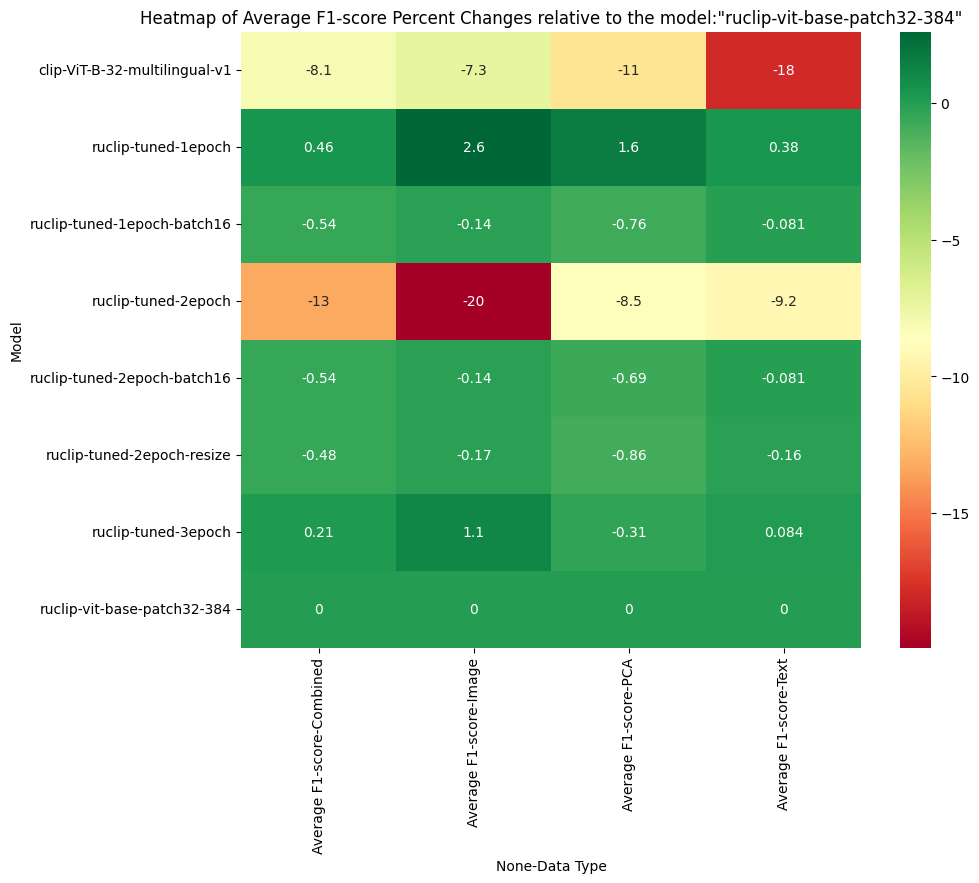

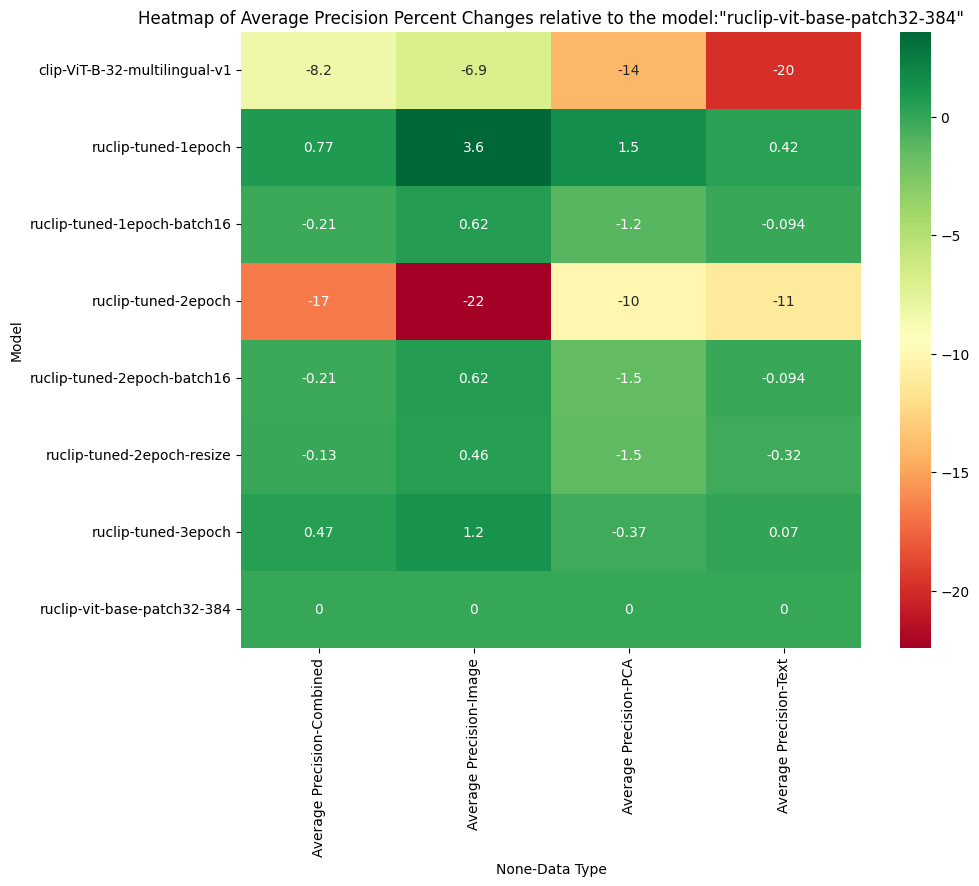

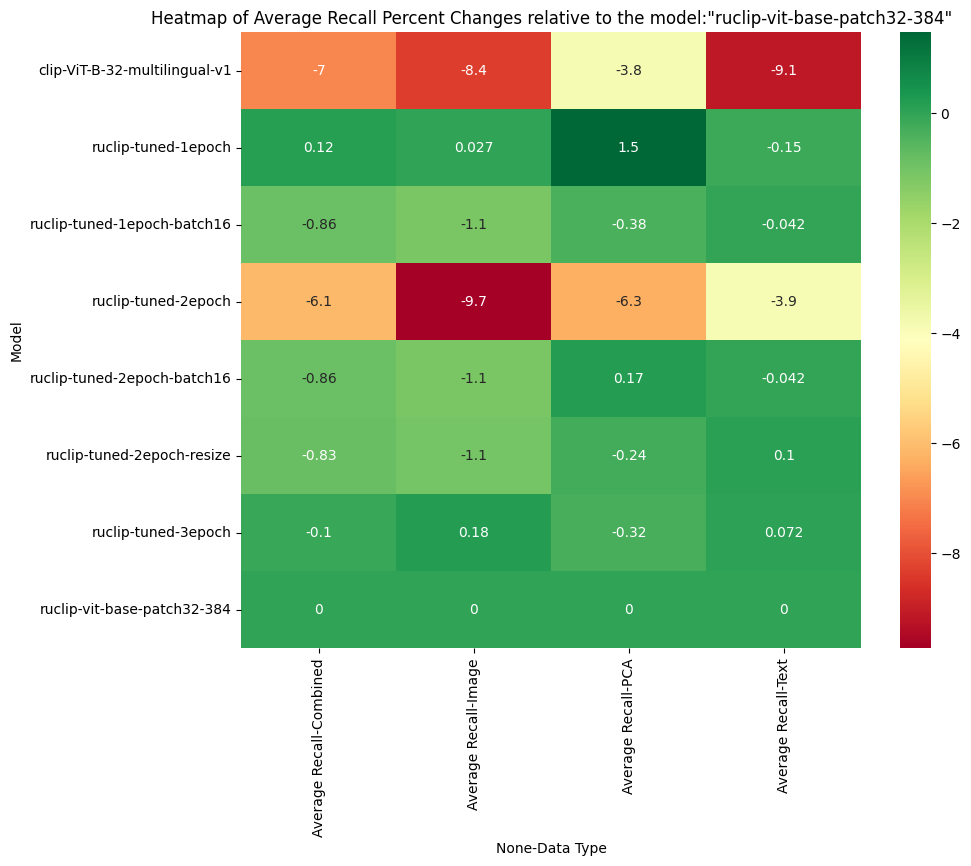

In [25]:

baseline_model_name = "ruclip-vit-base-patch32-384"
plot_heatmaps(result, baseline_model_name)


Последующее обучение ухудшает результат(((

## Мультикласс 

In [28]:
class ContentClassifier:
    def __init__(self, n_splits=5):
        self.n_splits = n_splits
        self.model = None

    def _concatenate_features(self, X):
        if isinstance(X, list):
            return np.concatenate(X, axis=1)
        else:
            return X

    def fit(self, X, y, average='weighted', one_score=True):
        X = self._concatenate_features(X)
        skf = StratifiedKFold(n_splits=self.n_splits, shuffle=True, random_state=42)
        scores = []


        for train_idx, val_idx in skf.split(X, y):
            X_train, X_val = X[train_idx], X[val_idx]
            y_train, y_val = y[train_idx], y[val_idx]

            # Обучение логистической регрессии
            model = LogisticRegression(class_weight='balanced', max_iter=5000, multi_class='multinomial', solver='lbfgs')
            model.fit(X_train, y_train)

            # Оценка производительности
            y_pred = model.predict(X_val)
            f1 = f1_score(y_val, y_pred, average=average)
            precision = precision_score(y_val, y_pred, average=average)
            recall = recall_score(y_val, y_pred, average=average)
            scores.append((f1, precision, recall))

        # Обучение финальной модели
        # self.model = LogisticRegression()
        # self.model.fit(X, y)

        if one_score:
            avg_f1 = sum(score[0] for score in scores) / len(scores)
            avg_precision = sum(score[1] for score in scores) / len(scores)
            avg_recall = sum(score[2] for score in scores) / len(scores)
            return avg_f1, avg_precision, avg_recall
        else:
            return scores

    def predict(self, X):
        if self.model is None:
            raise Exception("Model not trained yet. Call fit() first.")
        X = self._concatenate_features(X)
        return self.model.predict(X)
    
from sklearn.preprocessing import LabelEncoder

# Создание экземпляра LabelEncoder
label_encoder = LabelEncoder()

# Преобразование категориальных меток в числовые
y_cat = label_encoder.fit_transform(test_df['category'])

def replace_subcategory(df):
    # Создание копии DataFrame
    df_modified = df.copy()

    # Группировка по sub_category и подсчет количества строк в каждой группе
    counts = df_modified.groupby('sub_category').size()

    # Получение списка sub_category, где количество строк меньше 4
    sub_categories_to_replace = counts[counts < 11].index.tolist()

    # Замена sub_category на category для подходящих групп
    for sub_category in sub_categories_to_replace:
        category_value = df_modified.loc[df_modified['sub_category'] == sub_category, 'category'].iloc[0]
        df_modified.loc[df_modified['sub_category'] == sub_category, 'sub_category'] = category_value

    return df_modified

sub_df = replace_subcategory(test_df)


# Создание экземпляра LabelEncoder
label_encoder = LabelEncoder()

# Преобразование категориальных меток в числовые
y_sub = label_encoder.fit_transform(sub_df['sub_category'])


def get_metics(model_names, emb_path, tasks, df,save_path=save_path):
    columns = ['Model', 'Task', 'Data Type', 'Average F1-score', 'Average Precision', 'Average Recall']
    result_df = pd.DataFrame(columns=columns)
    
    total_iterations = len(model_names) * len(tasks)
    progress_bar = tqdm(total=total_iterations, desc='Progress')
    
    for model in range(len(model_names)):
        embeddings_path = emb_path[model]
        # Загрузка эмбедингов
        embeddings = np.load(embeddings_path)
        text_embeddings = embeddings['text']
        img_embeddings = embeddings['img']
        model_name = model_names[model]
        
        for i in range(len(tasks)):
            task = tasks[i]
            X_text = text_embeddings
            X_img = img_embeddings
            y = df[i]
            
            metrics = calculate_metrics(X_text, X_img, y,
                                        model_name=model_name,
                                        task=task)
            
            metrics = pd.DataFrame(metrics)
            result_df = pd.concat([result_df, metrics])
            result_df.to_csv(save_path)
            
            progress_bar.update(1)
    
    progress_bar.close()
    return result_df

In [31]:
import warnings
warnings.filterwarnings("ignore")

tasks = ['Category',"SubCategory"]

df = [y_cat,y_sub]
save_path = r'D:\wb\results\result_multy_log_regression.csv'

result  = get_metics(model_names, emb_path, tasks, df,save_path)
result 

Progress: 100%|██████████| 16/16 [58:19<00:00, 218.74s/it]


,Model,Task,Data Type,Average F1-score,Average Precision,Average Recall
0,ruclip-vit-base-patch32-384,Category,Text,0.822947,0.827571,0.822525
1,ruclip-vit-base-patch32-384,Category,Image,0.697043,0.704928,0.696514
2,ruclip-vit-base-patch32-384,Category,Combined,0.843907,0.846843,0.843795
3,ruclip-vit-base-patch32-384,Category,PCA,0.815330,0.817412,0.814742
0,ruclip-vit-base-patch32-384,SubCategory,Text,0.608901,0.732490,0.648304
...,...,...,...,...,...,...
3,ruclip-tuned-2epoch-batch16,Category,PCA,0.809878,0.812228,0.809407
0,ruclip-tuned-2epoch-batch16,SubCategory,Text,0.609280,0.733377,0.648572
1,ruclip-tuned-2epoch-batch16,SubCategory,Image,0.447342,0.507826,0.502633
2,ruclip-tuned-2epoch-batch16,SubCategory,Combined,0.676141,0.759391,0.698527


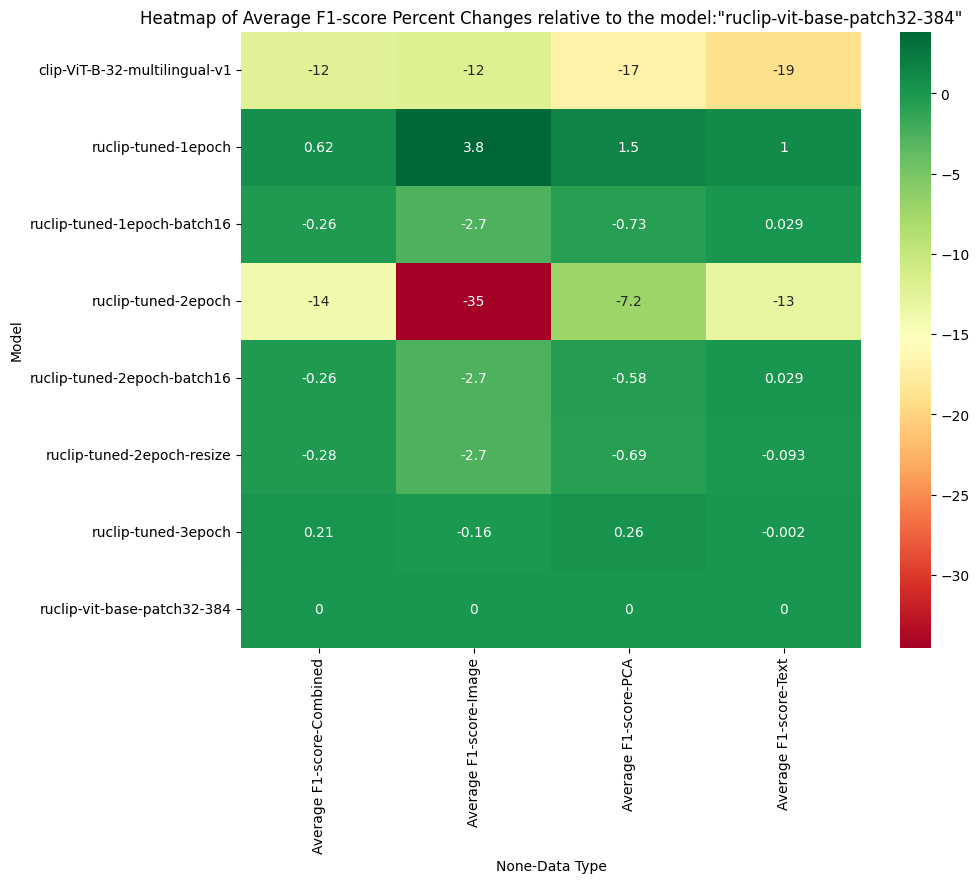

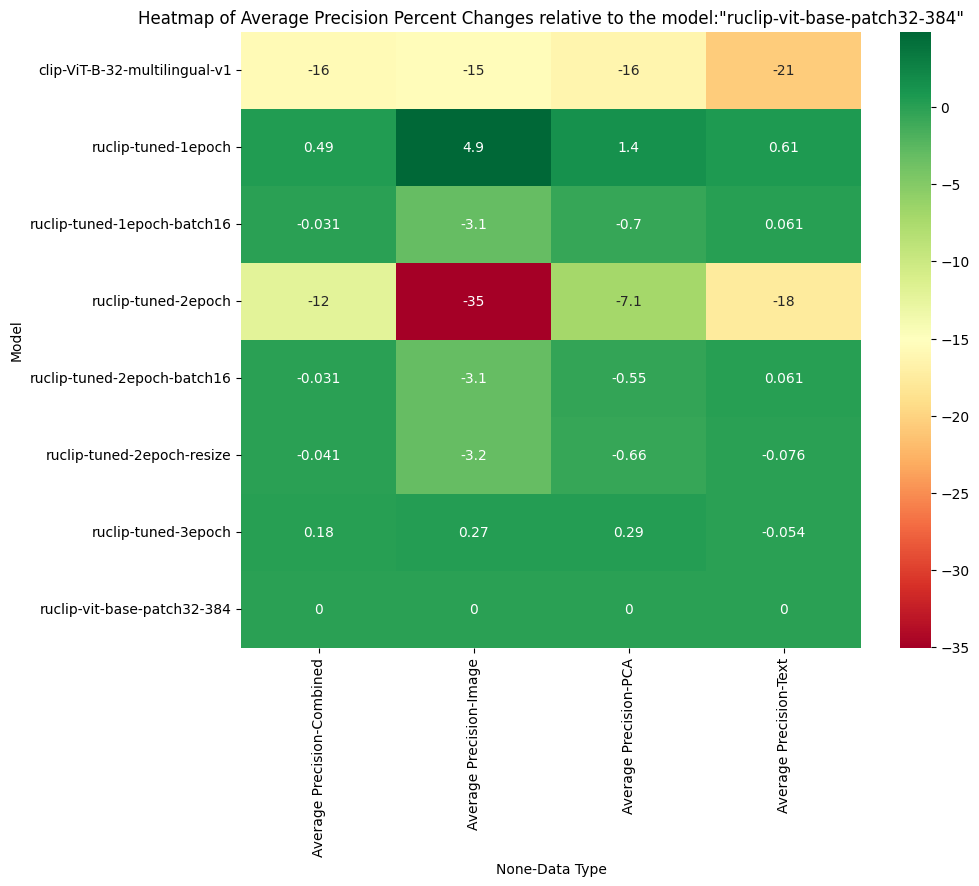

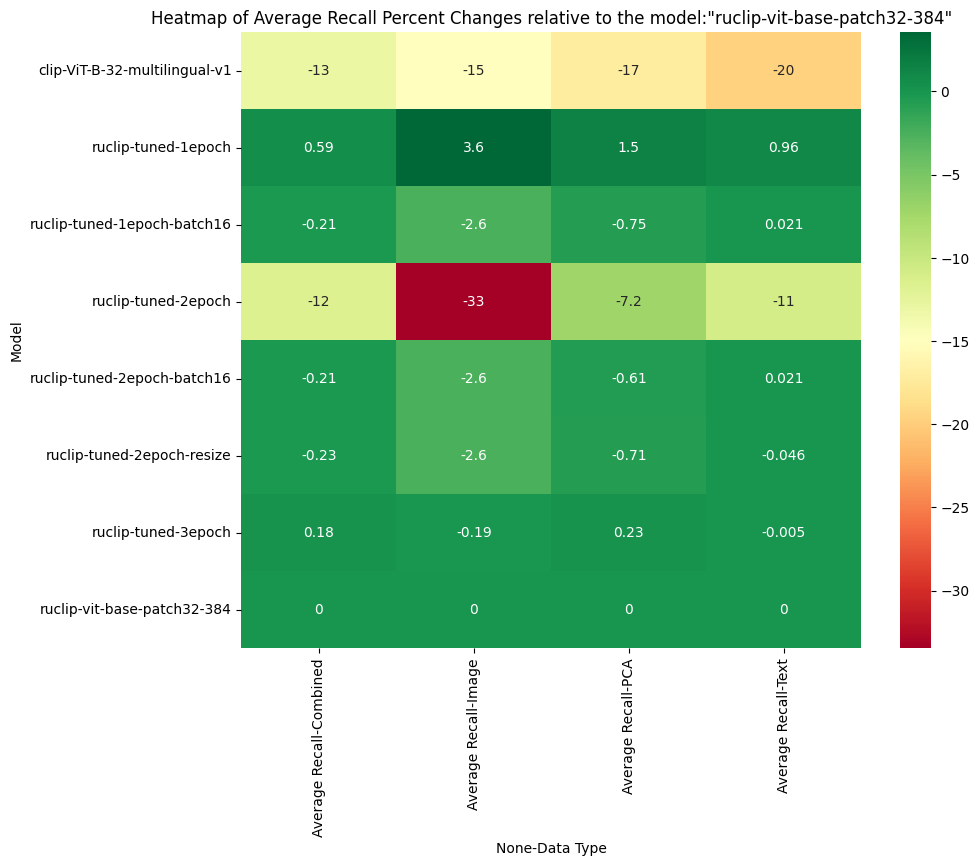

In [32]:
baseline_model_name = "ruclip-vit-base-patch32-384"
plot_heatmaps(result, baseline_model_name)

In [11]:
#result = pd.read_csv(r"D:\wb\fine_tuning_models\result_multiclass.csv")
grouped_df = result.groupby(['Model', 'Data Type']).agg({
    'Average F1-score': 'mean',
    'Average Precision': 'mean',
    'Average Recall': 'mean'
})

grouped_df.round(3)

Average F1-score  Average Precision  \
Model                         Data Type                                        
clip-ViT-B-32-multilingual-v1 Combined              0.668              0.676   
                              Image                 0.514              0.526   
                              Text                  0.580              0.619   
ruclip-tuned-1epoch           Combined              0.766              0.807   
                              Image                 0.607              0.653   
                              Text                  0.723              0.785   
ruclip-tuned-2epoch           Combined              0.655              0.705   
                              Image                 0.383              0.405   
                              Text                  0.622              0.642   
ruclip-tuned-3epoch           Combined              0.763              0.804   
                              Image                 0.584              0.624   
                              Text                  0.716              0.780   
ruclip-vit-base-patch32-384   Combined              0.762              0.803   
                              Image                 0.585              0.623   
                              Text                  0.716              0.780   

                                         Average Recall  
Model                         Data Type                  
clip-ViT-B-32-multilingual-v1 Combined            0.672  
                              Image               0.521  
                              Text                0.591  
ruclip-tuned-1epoch           Combined            0.777  
                              Image               0.634  
                              Text                0.742  
ruclip-tuned-2epoch           Combined            0.682  
                              Image               0.408  
                              Text                0.654  
ruclip-tuned-3epoch           Combined            0.774  
                              Image               0.611  
                              Text                0.735  
ruclip-vit-base-patch32-384   Combined            0.772  
                              Image               0.612  
                              Text                0.735

# MLP

In [18]:
# import numpy as np
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import f1_score, precision_score, recall_score
# import pytorch_lightning as pl


# import torch
# import torch.nn as nn
# from torchmetrics import F1Score, Precision, Recall
# import pytorch_lightning as pl
# from torch.optim import Adam

# class Classifier(pl.LightningModule):
#     def __init__(self, input_dim, output_dim, task=None):
#         super().__init__()
#         self.layers = nn.Sequential(
#             nn.Linear(input_dim, 128),
#             nn.ReLU(),
#             nn.Linear(128, 64),
#             nn.ReLU(),
#             nn.Linear(64, output_dim)
#         )
#         self.criterion = nn.CrossEntropyLoss()
        
#         if task is None:
#             unique_labels = output_dim
#             if unique_labels > 2:
#                 task = 'multiclass'
#             else:
#                 task = 'binary'
       
        
#         # Инициализация метрик
#         average_type = 'weighted' if task == 'multiclass' else 'binary'
#         self.train_f1 = F1Score(num_classes=output_dim, average=average_type, task=task)
#         self.val_f1 = F1Score(num_classes=output_dim, average=average_type, task=task)
#         self.val_precision = Precision(num_classes=output_dim, average=average_type, task=task)
#         self.val_recall = Recall(num_classes=output_dim, average=average_type, task=task)

#     def forward(self, x):
#         return self.layers(x)
    
#     def predict_step(self, batch, batch_idx, dataloader_idx=0):
#         x, _ = batch
#         y_hat = self(x)
#         return y_hat

#     def training_step(self, batch, batch_idx):
#         x, y = batch
#         y = y.long()
#         y_hat = self(x)
#         loss = self.criterion(y_hat, y)
#         y_hat_labels = y_hat.argmax(dim=1)  # Получение предсказанных меток
#         self.train_f1(y_hat_labels, y)
#         self.log('train_loss', loss)
#         self.log('train_f1', self.train_f1, on_step=False, on_epoch=True)
#         return loss

#     def validation_step(self, batch, batch_idx):
#         x, y = batch
#         y = y.long()
#         y_hat = self(x)
#         loss = self.criterion(y_hat, y)
#         y_hat_labels = y_hat.argmax(dim=1)  # Получение предсказанных меток
#         self.val_f1(y_hat_labels, y)
#         self.val_precision(y_hat_labels, y)
#         self.val_recall(y_hat_labels, y)
#         self.log('val_loss', loss)
#         self.log('val_f1', self.val_f1, on_step=False, on_epoch=True)
#         self.log('val_precision', self.val_precision, on_step=False, on_epoch=True)
#         self.log('val_recall', self.val_recall, on_step=False, on_epoch=True)
#         return loss

#     def configure_optimizers(self):
#         return Adam(self.parameters(), lr=1e-3)

In [3]:
import numpy as np
import torch
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score, precision_score, recall_score
import pytorch_lightning as pl
import logging
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, precision_score, recall_score

class ContentClassifier:
    def __init__(self, n_splits=5, problem ='binary'):
        self.n_splits = n_splits
        self.model = None
        self.task = problem

    def _concatenate_features(self, X):
        if isinstance(X, list):
            return np.concatenate(X, axis=1)
        else:
            return X

    def fit(self, X, y, оne_score=True):
        average= self.task
        X = self._concatenate_features(X)
        skf = StratifiedKFold(n_splits=self.n_splits, shuffle=True, random_state=42)
        scores = []

        for train_idx, val_idx in skf.split(X, y):
            X_train, X_val = X[train_idx], X[val_idx]
            y_train, y_val = y[train_idx], y[val_idx]

            # Обучение MLPClassifier
            model = MLPClassifier(hidden_layer_sizes=(128,), activation='relu', solver='adam', max_iter=5000)
            model.fit(X_train, y_train)

            # Оценка производительности
            y_pred = model.predict(X_val)
            f1 = f1_score(y_val, y_pred, average=average)
            precision = precision_score(y_val, y_pred, average=average)
            recall = recall_score(y_val, y_pred, average=average)
            scores.append((f1, precision, recall))

        # Обучение финальной модели
        # self.model = MLPClassifier(hidden_layer_sizes=(128,), activation='relu', solver='adam', max_iter=5000)
        # self.model.fit(X, y)

        if оne_score:
            avg_f1 = sum(score[0] for score in scores) / len(scores)
            avg_precision = sum(score[1] for score in scores) / len(scores)
            avg_recall = sum(score[2] for score in scores) / len(scores)
            return avg_f1, avg_precision, avg_recall
        else:
            return scores

    def predict(self, X):
        if self.model is None:
            raise Exception("Model not trained yet. Call fit() first.")
        X = self._concatenate_features(X)
        return self.model.predict(X)

# # Пример использования:
# X = img_embeddings[is_child_df['index']]
# y = is_child_df['target'].values 
# classifier = ContentClassifier(n_splits=5)
# avg_f1, avg_precision, avg_recall = classifier.fit(X, y)
# print(f"Average F1-score: {avg_f1}, Average Precision: {avg_precision}, Average Recall: {avg_recall}")


def calculate_metrics(X_text, X_img, y,
                      model_name='clip-ViT-B-32-multilingual-v1',
                      task='IsAdult',
                      data_type=['Text', 'Image', 'Combined', 'PCA'],average="binary"):
    # Нормализация данных перед применением PCA и UMAP
    scaler = StandardScaler()

    # Создание объектов классификаторов
    classifier_text = ContentClassifier(n_splits=5, problem = average)
    classifier_img = ContentClassifier(n_splits=5, problem = average)
    classifier_combined = ContentClassifier(n_splits=5, problem = average)
    classifier_pca = ContentClassifier(n_splits=5, problem = average)
    #classifier_umap = ContentClassifier(n_splits=5)

    # Классификация для текстовых данных
    avg_f1_text, avg_precision_text, avg_recall_text = classifier_text.fit(
        X_text, y)

    # Классификация для изображений
    avg_f1_img, avg_precision_img, avg_recall_img = classifier_img.fit(
        X_img, y)

    # Объединение данных
    X_combined = np.concatenate([X_text, X_img], axis=1)

    # Классификация для объединенных данных
    avg_f1_combined, avg_precision_combined, avg_recall_combined = classifier_combined.fit(
        X_combined, y)

    # Применение PCA
    X_pca = PCA(n_components=512).fit_transform(
        scaler.fit_transform(X_combined))
    avg_f1_pca, avg_precision_pca, avg_recall_pca = classifier_pca.fit(
        X_pca, y)

    # Применение UMAP
    # X_umap = umap.UMAP(n_components=512).fit_transform(
    #     scaler.fit_transform(X_combined))
    # avg_f1_umap, avg_precision_umap, avg_recall_umap = classifier_umap.fit(
    #     X_umap, y)

    return {
        'Model': model_name,
        'Task': task,
        'Data Type': data_type,
        'Average F1-score': [avg_f1_text, avg_f1_img, avg_f1_combined, avg_f1_pca],
        'Average Precision': [avg_precision_text, avg_precision_img, avg_precision_combined, avg_precision_pca],
        'Average Recall': [avg_recall_text, avg_recall_img, avg_recall_combined, avg_recall_pca]
    }
    
    
    
def get_metics(model_names, emb_path, tasks, df, save_path=r'D:\wb\fine-tuned-ruclip_result.csv',average='binary'):
    columns = ['Model', 'Task', 'Data Type', 'Average F1-score', 'Average Precision', 'Average Recall']
    result_df = pd.DataFrame(columns=columns)
    
    total_iterations = len(model_names) * len(tasks)
    progress_bar = tqdm(total=total_iterations, desc='Progress')
    
    for model in range(len(model_names)):
        embeddings_path = emb_path[model]
        # Загрузка эмбедингов
        embeddings = np.load(embeddings_path)
        text_embeddings = embeddings['text']
        img_embeddings = embeddings['img']
        model_name = model_names[model]
        
        for i in range(len(tasks)):
            task = tasks[i]
            X_text = text_embeddings[df[i]['index']]
            X_img = img_embeddings[df[i]['index']]
            y = df[i]['target'].values
            
            metrics = calculate_metrics(X_text, X_img, y,
                                        model_name=model_name,
                                        task=task,
                                        average=average)
            
            metrics = pd.DataFrame(metrics)
            result_df = pd.concat([result_df, metrics])
            result_df.to_csv(save_path)
            
            progress_bar.update(1)
    
    progress_bar.close()
    return result_df

In [34]:
import warnings
warnings.filterwarnings("ignore")

tasks = ['IsAdult','Male/Famale_Clothes','IsChild_Clothes']


df = [is_adult_df,male_female_df,is_child_df]
save_path = r'D:\wb\results\binory_mlp.csv'
result = get_metics(model_names,emb_path,tasks ,df,save_path)
result

Progress: 100%|██████████| 24/24 [34:02<00:00, 85.12s/it]


,Model,Task,Data Type,Average F1-score,Average Precision,Average Recall
0,ruclip-vit-base-patch32-384,IsAdult,Text,0.902876,0.920233,0.887200
1,ruclip-vit-base-patch32-384,IsAdult,Image,0.741888,0.815696,0.680967
2,ruclip-vit-base-patch32-384,IsAdult,Combined,0.890588,0.899802,0.882899
3,ruclip-vit-base-patch32-384,IsAdult,PCA,0.914640,0.950593,0.881807
0,ruclip-vit-base-patch32-384,Male/Famale_Clothes,Text,0.702874,0.726531,0.681820
...,...,...,...,...,...,...
3,ruclip-tuned-2epoch-batch16,Male/Famale_Clothes,PCA,0.900731,0.923317,0.879457
0,ruclip-tuned-2epoch-batch16,IsChild_Clothes,Text,0.844133,0.851490,0.837709
1,ruclip-tuned-2epoch-batch16,IsChild_Clothes,Image,0.906261,0.908980,0.903741
2,ruclip-tuned-2epoch-batch16,IsChild_Clothes,Combined,0.926680,0.928236,0.925229


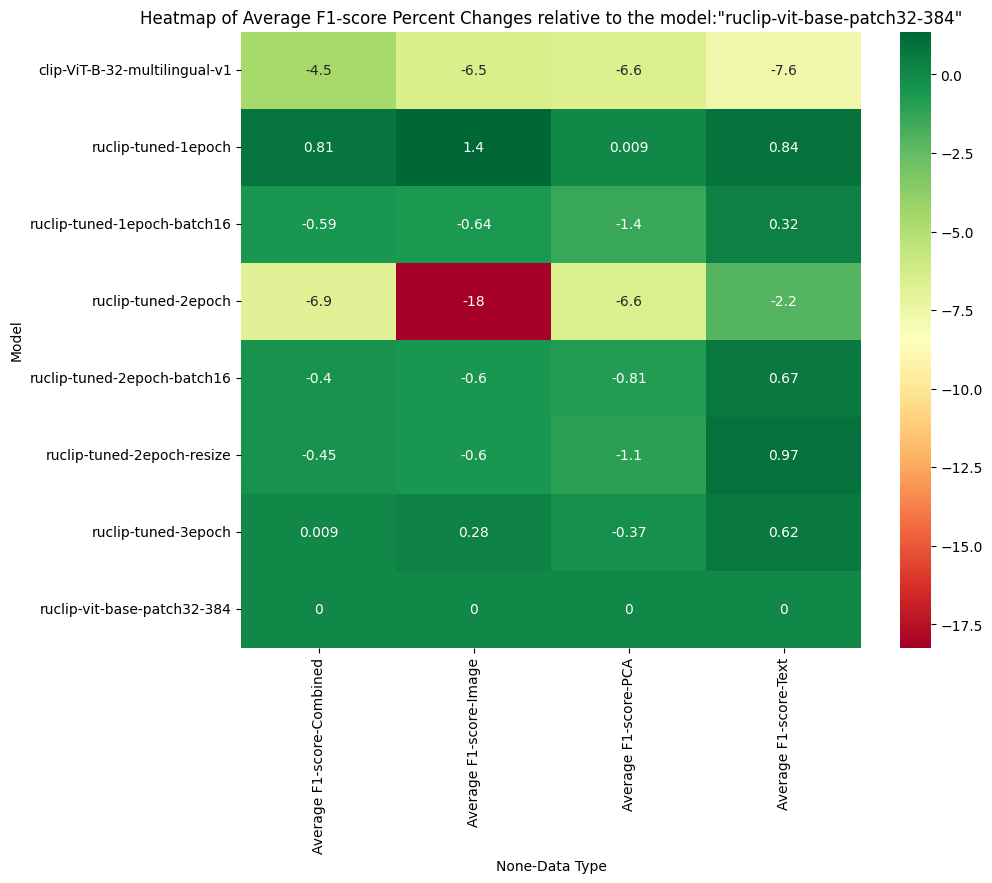

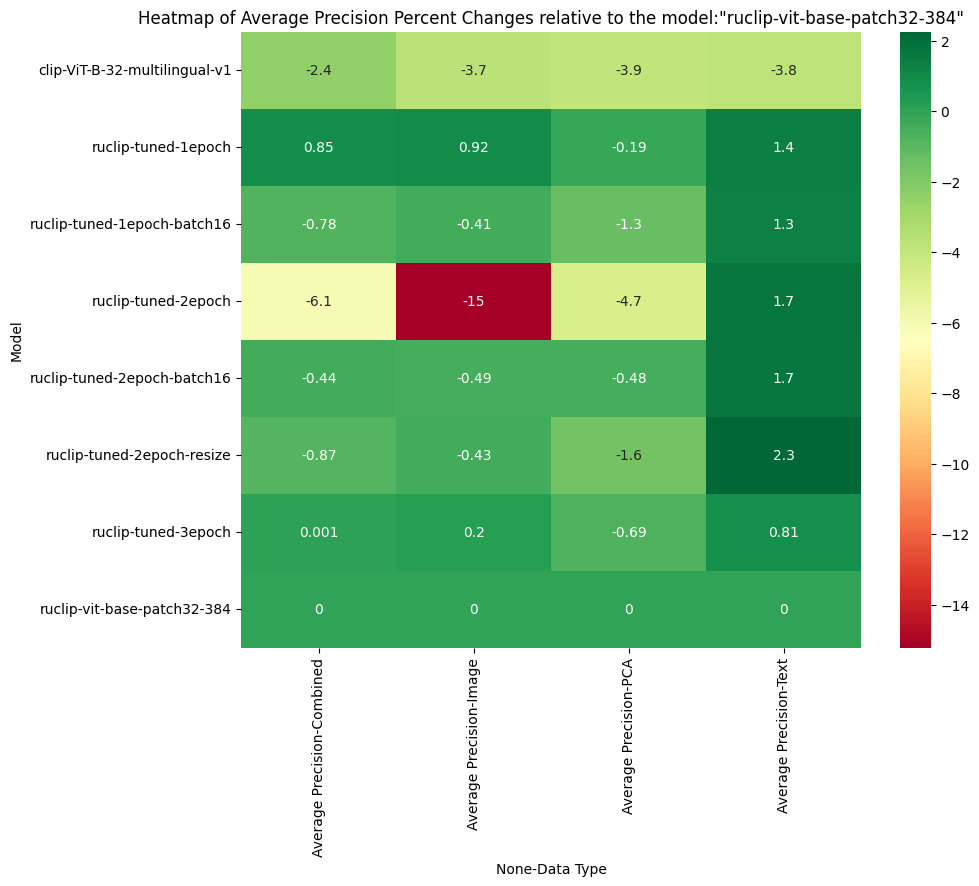

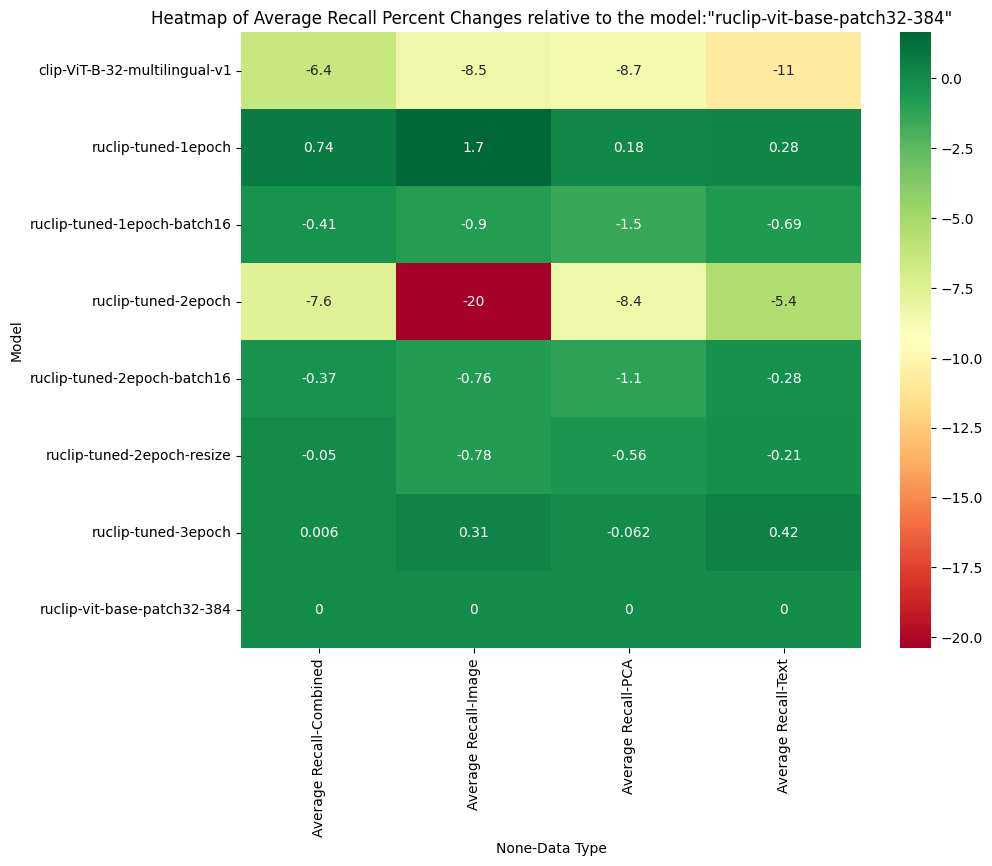

In [35]:
baseline_model_name = "ruclip-vit-base-patch32-384"
plot_heatmaps(result, baseline_model_name)

# Мультикласс 

In [3]:
from sklearn.preprocessing import LabelEncoder

# Создание экземпляра LabelEncoder
label_encoder = LabelEncoder()

# Преобразование категориальных меток в числовые
y_cat = label_encoder.fit_transform(test_df['category'])

def replace_subcategory(df):
    # Создание копии DataFrame
    df_modified = df.copy()

    # Группировка по sub_category и подсчет количества строк в каждой группе
    counts = df_modified.groupby('sub_category').size()

    # Получение списка sub_category, где количество строк меньше 4
    sub_categories_to_replace = counts[counts < 11].index.tolist()

    # Замена sub_category на category для подходящих групп
    for sub_category in sub_categories_to_replace:
        category_value = df_modified.loc[df_modified['sub_category'] == sub_category, 'category'].iloc[0]
        df_modified.loc[df_modified['sub_category'] == sub_category, 'sub_category'] = category_value

    return df_modified

sub_df = replace_subcategory(test_df)


# Создание экземпляра LabelEncoder
label_encoder = LabelEncoder()

# Преобразование категориальных меток в числовые
y_sub = label_encoder.fit_transform(sub_df['sub_category'])

In [5]:
# Создание DataFrame с индексами и преобразованными метками категорий
df_y_cat = pd.DataFrame({'index': test_df.index, 'target': y_cat})

# Сохранение меток категорий в CSV-файл
df_y_cat.to_csv(r'D:\wb\scripts\testy_cat.csv', index=False)

In [5]:
def get_metics(model_names, emb_path, tasks, df, save_path=r'D:\wb\fine-tuned-ruclip_result.csv',average='binary'):
    columns = ['Model', 'Task', 'Data Type', 'Average F1-score', 'Average Precision', 'Average Recall']
    result_df = pd.DataFrame(columns=columns)
    
    total_iterations = len(model_names) * len(tasks)
    progress_bar = tqdm(total=total_iterations, desc='Progress')
    
    for model in range(len(model_names)):
        embeddings_path = emb_path[model]
        # Загрузка эмбедингов
        embeddings = np.load(embeddings_path)
        text_embeddings = embeddings['text']
        img_embeddings = embeddings['img']
        model_name = model_names[model]
        
        for i in range(len(tasks)):
            task = tasks[i]
            X_text = text_embeddings
            X_img = img_embeddings
            y = df[i]
            
            metrics = calculate_metrics(X_text, X_img, y,
                                        model_name=model_name,
                                        task=task,
                                        average=average)
            
            metrics = pd.DataFrame(metrics)
            result_df = pd.concat([result_df, metrics])
            result_df.to_csv(save_path)
            
            progress_bar.update(1)
    
    
    progress_bar.close()
    return result_df

In [18]:
# Группируем по модели и находим индексы строк с максимальным значением Average F1-score для каждой модели
idx = cat.groupby(['Model',"Task"])['Average F1-score'].idxmax()

# Извлекаем строки с этими индексами
max_f1_scores_df = cat.loc[idx].reset_index(drop=True)
max_f1_scores_df.drop(columns='Unnamed: 0',inplace=True) 
max_f1_scores_df.sort_values(by='Average F1-score',ascending=False)

,Model,Task,Data Type,Average F1-score,Average Precision,Average Recall
0,ruclip-tuned-1epoch,Category,PCA,0.848285,0.849638,0.848593
6,ruclip-vit-base-patch32-384,Category,PCA,0.837904,0.838966,0.838360
2,ruclip-tuned-2epoch-batch16,Category,PCA,0.834408,0.835311,0.835073
4,ruclip-tuned-2epoch-resize,Category,PCA,0.833523,0.834951,0.833898
1,ruclip-tuned-1epoch,SubCategory,Combined,0.752983,0.766431,0.758446
7,ruclip-vit-base-patch32-384,SubCategory,Combined,0.742188,0.755927,0.747979
5,ruclip-tuned-2epoch-resize,SubCategory,Combined,0.739869,0.753968,0.745530
3,ruclip-tuned-2epoch-batch16,SubCategory,Combined,0.736011,0.750133,0.741403


In [17]:

bi = pd.read_csv(r'D:\wb\results\binory_mlp.csv')
# Группируем по модели и находим индексы строк с максимальным значением Average F1-score для каждой модели
idx = bi.groupby(['Model',"Task"])['Average F1-score'].idxmax()

# Извлекаем строки с этими индексами
max_f1_scores_df = bi.loc[idx].reset_index(drop=True)
max_f1_scores_df.drop(columns='Unnamed: 0',inplace=True) 
max_f1_scores_df[max_f1_scores_df['Model'].isin(model_names)]

,Model,Task,Data Type,Average F1-score,Average Precision,Average Recall
3,ruclip-tuned-1epoch,IsAdult,PCA,0.916991,0.946794,0.889351
4,ruclip-tuned-1epoch,IsChild_Clothes,PCA,0.936742,0.948830,0.925239
5,ruclip-tuned-1epoch,Male/Famale_Clothes,Combined,0.928398,0.930403,0.926591
12,ruclip-tuned-2epoch-batch16,IsAdult,PCA,0.910110,0.949334,0.874320
13,ruclip-tuned-2epoch-batch16,IsChild_Clothes,PCA,0.941557,0.954339,0.929207
14,ruclip-tuned-2epoch-batch16,Male/Famale_Clothes,Combined,0.906508,0.911639,0.902045
15,ruclip-tuned-2epoch-resize,IsAdult,PCA,0.908490,0.939827,0.879685
16,ruclip-tuned-2epoch-resize,IsChild_Clothes,PCA,0.931951,0.938017,0.926013
17,ruclip-tuned-2epoch-resize,Male/Famale_Clothes,Combined,0.906797,0.908105,0.905819
21,ruclip-vit-base-patch32-384,IsAdult,PCA,0.914640,0.950593,0.881807


In [6]:
import warnings
warnings.filterwarnings("ignore")

tasks = ['Category',"SubCategory"]

df = [y_cat,y_sub]
save_path =r'D:\wb\results\multy_mlp.csv'


result = get_metics(model_names, emb_path, tasks , df, save_path,average='weighted')
result

Progress: 100%|██████████| 8/8 [2:37:27<00:00, 1180.88s/it]  


,Model,Task,Data Type,Average F1-score,Average Precision,Average Recall
0,ruclip-vit-base-patch32-384,Category,Text,0.810842,0.812973,0.810951
1,ruclip-vit-base-patch32-384,Category,Image,0.661450,0.663373,0.662059
2,ruclip-vit-base-patch32-384,Category,Combined,0.830155,0.832026,0.830174
3,ruclip-vit-base-patch32-384,Category,PCA,0.837904,0.838966,0.838360
0,ruclip-vit-base-patch32-384,SubCategory,Text,0.719254,0.734622,0.723924
1,ruclip-vit-base-patch32-384,SubCategory,Image,0.544282,0.563221,0.548831
2,ruclip-vit-base-patch32-384,SubCategory,Combined,0.742188,0.755927,0.747979
3,ruclip-vit-base-patch32-384,SubCategory,PCA,0.739419,0.751125,0.746066
0,ruclip-tuned-1epoch,Category,Text,0.822131,0.823753,0.822291
1,ruclip-tuned-1epoch,Category,Image,0.683044,0.684805,0.683598


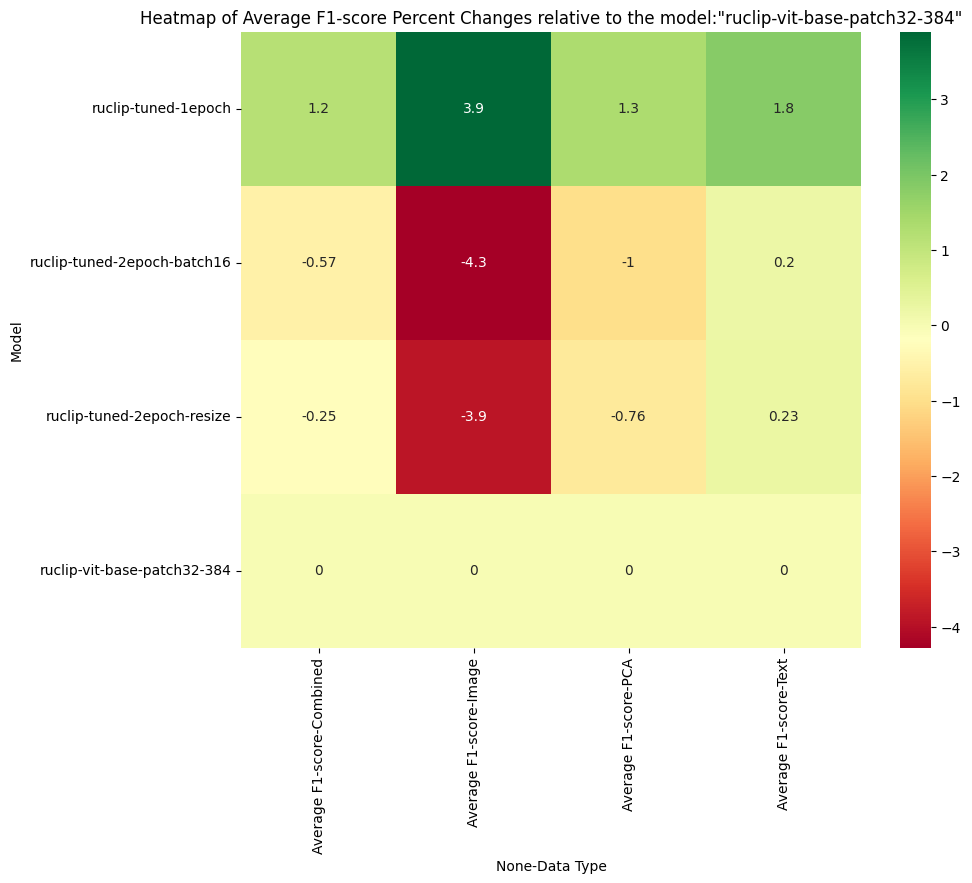

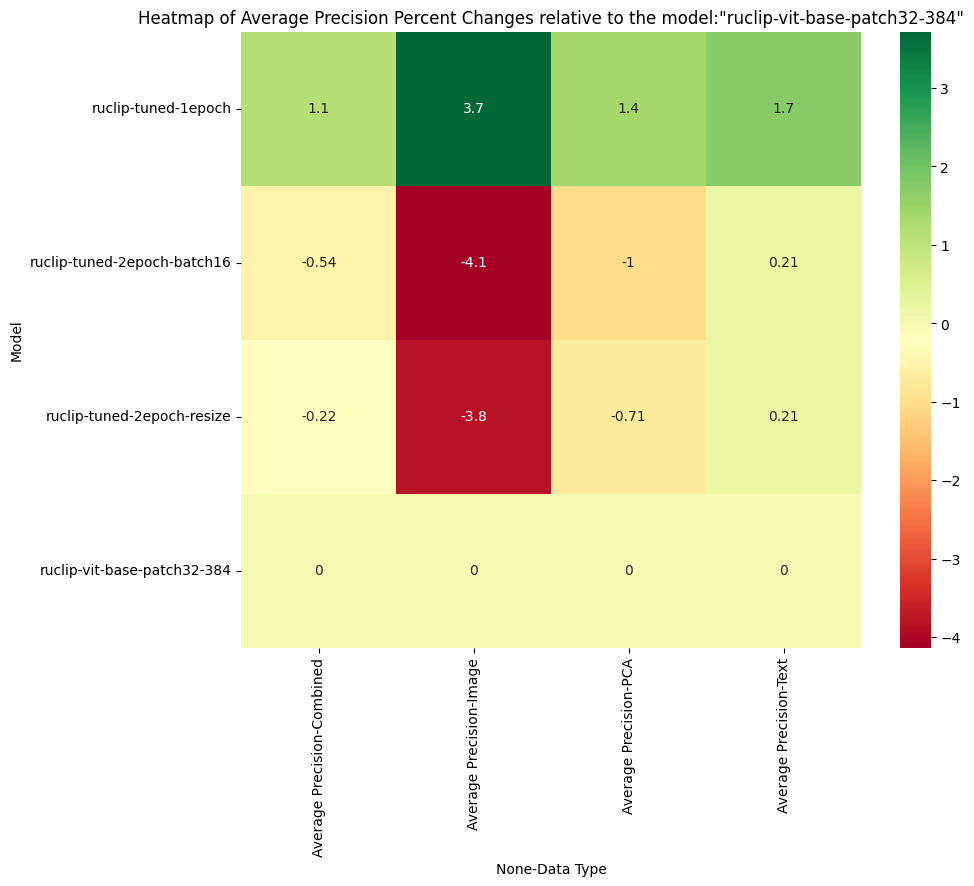

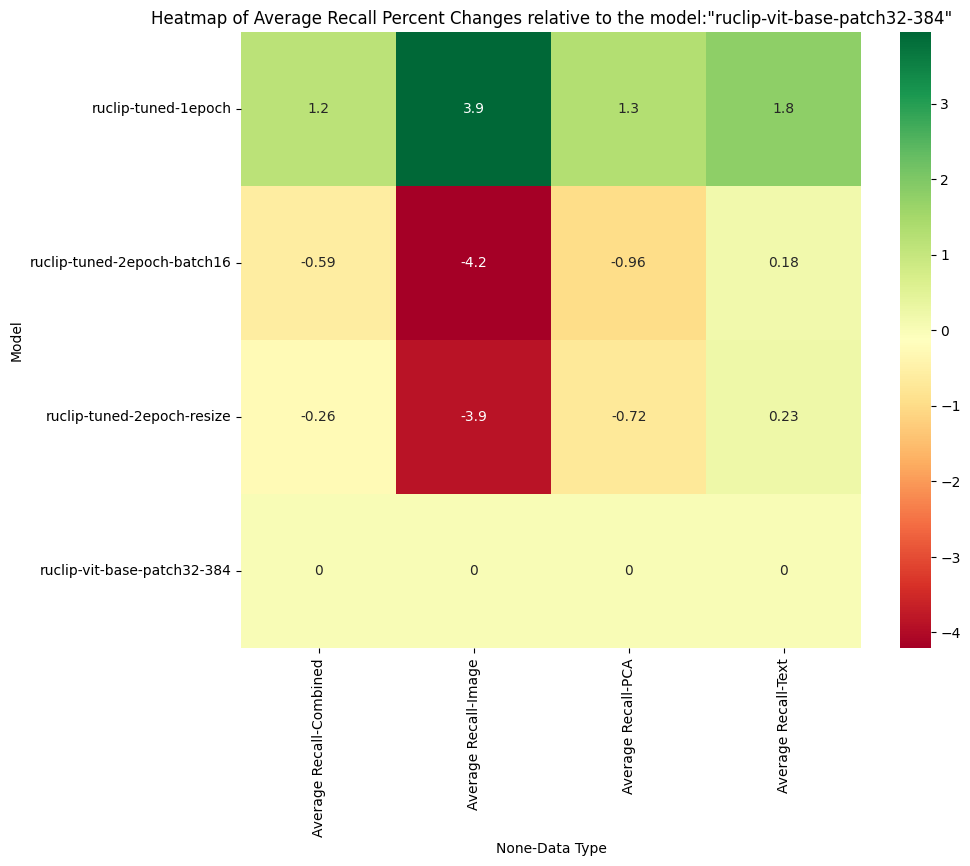

In [9]:
baseline_model_name = "ruclip-vit-base-patch32-384"
plot_heatmaps(result, baseline_model_name)

# Итог 

Дообучение в одну эпоху с lr=1e-6 показало наилучший результат из представленных моделей, как в линейном классификаторе, так и в нейроном. Отчетливо видно насколько улучшаются метрки для изображений и не так сильно, для текста и комбинированного варианта. Однако не все так радужно, при дальнейшем прохождении по эпохам, проскакиваем точку оптимума и метрики начинают падать, особенно хорошо заметно при визуализации. Возможные решения, поиграть еще с  lr, ронять его более быстро на каждой эпохе. И другими параметрами оптимизации, хорошо бы было попробовать через Optuna, все упирается в GPU часы. Каждый маневр по валидации занимает большое количество времени 

# Проекции векторов 

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.subplots as sp
import umap

def plot_3d_projection(points, categories, titles, fig, row, col, title='3D Scatter Plot'):
    """ Функция для добавления трехмерного графика на сабплот. """
    data = pd.DataFrame({'x': points[:, 0], 'y': points[:, 1], 'z': points[:, 2],
                         'category': categories, 'title': titles})
    scatter = px.scatter_3d(data, x='x', y='y', z='z', color='category', opacity=0.7,
                            hover_name='title', title=title)
    for trace in scatter.data:
        fig.add_trace(trace, row=row, col=col)

    fig.update_layout(
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z',
            camera=dict(eye=dict(x=1.5, y=1.5, z=1.5))
        ),
        scene_aspectmode='cube'
    )
    
    # Настройка размера маркеров (уменьшаем размер до 2 для более элегантного вида)
    fig.update_traces(marker=dict(size=2), selector=dict(type='scatter3d'))

def show_plot(model_names, emb_path, embs):
    # Создаем фигуру с сабплотами: количество строк - количество моделей, колонки - количество типов эмбеддингов
    fig = sp.make_subplots(rows=len(model_names), cols=len(embs), 
                           subplot_titles=[f"{model} {emb}" for model in model_names for emb in embs],
                           specs=[[{'type': 'scatter3d'} for _ in embs] for _ in model_names])

    for i, model_name in enumerate(model_names):
        embeddings_path = emb_path[i]
        embeddings = np.load(embeddings_path)
        for j, emb in enumerate(embs):
            projections = umap.UMAP(n_components=3).fit_transform(embeddings[emb])
            plot_3d_projection(projections, test_df['category'], test_df['title'], fig, row=i+1, col=j+1, title=model_name + ' ' + emb)

    fig.update_layout(height=700 * len(model_names), width=800 * len(embs), title_text="Embedding Visualizations")
    fig.show()




In [ ]:
embs = ['text','img']
show_plot(model_names, emb_path, embs)

In [ ]:
model_names = ["ruclip-vit-base-patch32-384","clip-ViT-B-32-multilingual-v1",'ruclip-tuned-1epoch','ruclip-tuned-2epoch','ruclip-tuned-3epoch']
emb_path = [r"D:\wb\emb\ruclip-vit-base-patch32-384_embeddings.npz",
    r"D:\wb\emb\clip-ViT-B-32-multilingual-v1_text+img_embeddings.npz",
    r"D:\wb\fine_tuning_models\fine_tuned_ruclip_emb.npz",
    r"D:\wb\fine_tuning_models\fine_tuned_ruclip_2epoch.npz",
    r"D:\wb\fine_tuning_models\fine_tuned_ruclip_3epoch.npz"
]
embs = ['text','img']
show_plot(model_names, emb_path, embs)

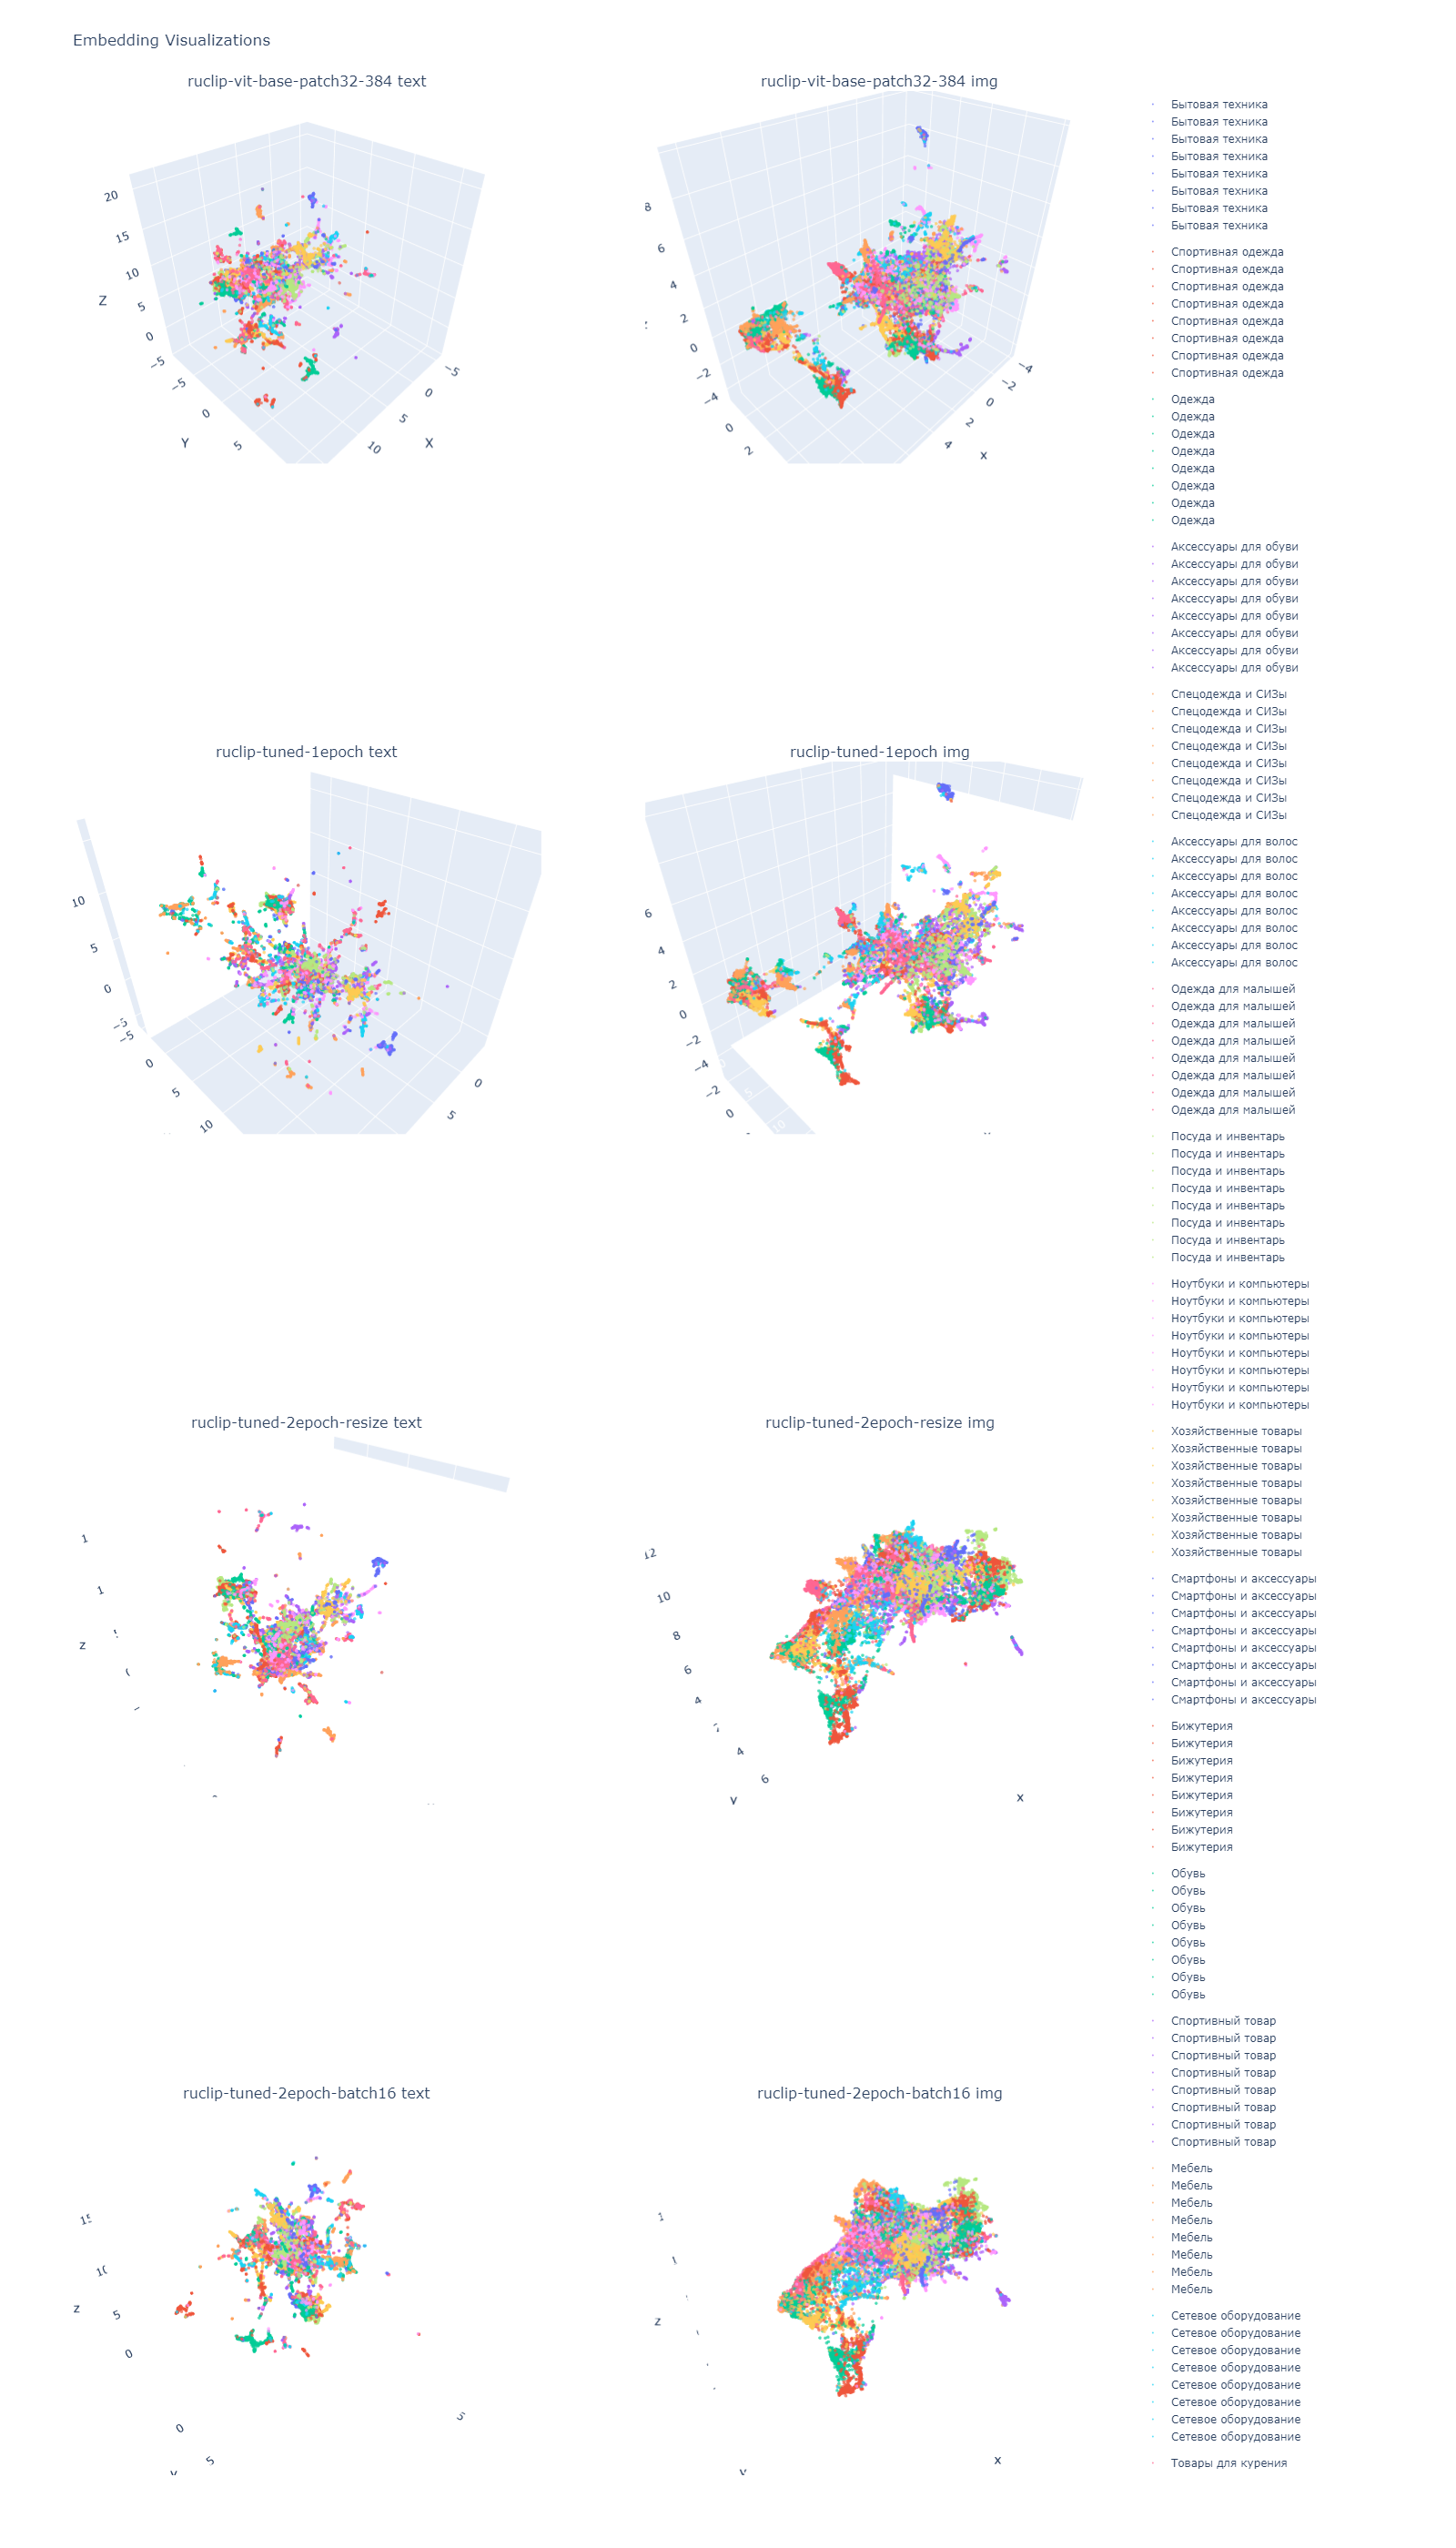

In [5]:
Image.open(r"D:\wb\results\vector_umap.png")

# PipeLine

### Загрузка тестового датасета 

In [21]:
import pandas as pd 


def convert_filepaths(df, old_base_path, new_base_path, filepath_column):
    """
    Преобразует пути к файлам в DataFrame.

    Args:
        df (pd.DataFrame): DataFrame, содержащий пути к файлам.
        old_base_path (str): Старый базовый путь, который нужно заменить.
        new_base_path (str): Новый базовый путь.
        filepath_column (str): Название столбца, содержащего пути к файлам.

    Returns:
        pd.DataFrame: DataFrame с преобразованными путями к файлам.
    """

    df[filepath_column] = df[filepath_column].str.replace(old_base_path, new_base_path)
    return df

test = pd.read_csv(r"D:\wb\data_frame\test_kaggle.csv\test_kaggle.csv")
old_base_path = r'C:\data_for_learning\Horizont ML\full_images/'
new_base_path = 'C:\data_for_learning\\Horizont ML\\full_images\\'
filepath_column = 'image_path'
test  = convert_filepaths(test, old_base_path, new_base_path, filepath_column)
test


<>:23: SyntaxWarning:

invalid escape sequence '\d'

<>:23: SyntaxWarning:

invalid escape sequence '\d'

C:\Users\theju\AppData\Local\Temp\ipykernel_11272\4002813314.py:23: SyntaxWarning:

invalid escape sequence '\d'



,title,image_path
0,Утюг с тефлоновым покрытием и отпариванием 180...,C:\data_for_learning\Horizont ML\full_images\1...
1,Шорты спортивные подростковые плавки,C:\data_for_learning\Horizont ML\full_images\8...
2,Футболка базовая большие размеры,C:\data_for_learning\Horizont ML\full_images\1...
3,Краска спрей для обуви из замши нубука велюра ...,C:\data_for_learning\Horizont ML\full_images\1...
4,Медицинская куртка медодежда рубашка,C:\data_for_learning\Horizont ML\full_images\2...
...,...,...
29802,Магний Глицинат 350мг / Glycinate,C:\data_for_learning\Horizont ML\full_images\4...
29803,Резинки для волос белые набор,C:\data_for_learning\Horizont ML\full_images\1...
29804,Винтажные стикеры для творчества,C:\data_for_learning\Horizont ML\full_images\5...
29805,Фитоклон укоренитель гель для укоренения корне...,C:\data_for_learning\Horizont ML\full_images\1...


In [ ]:
text_list = test['title'].tolist()
image_path = test['image_path'].tolist()
image = Image.open(image_path [0])
text = text_list[0]
image

## Класс 

Класс `Pipeline` предоставляет удобный интерфейс для работы с моделями ruCLIP, обеспечивая загрузку базовых или дообученных моделей, получение эмбеддингов и измерение производительности. Основная задача класса - преобразование текстов и изображений в векторные представления (эмбеддинги), а также измерение среднего времени обработки одного батча и одного семпла. 

На вход список текс и список путей к изображениям 
Класс `Pipeline` предоставляет удобный интерфейс для загрузки, использования и измерения производительности моделей ruCLIP. Он поддерживает как базовые, так и дообученные модели, и включает в себя следующие методы:

### Методы класса

- **`__init__(self, base_model_name='ruclip-vit-base-patch32-384', fine_tuned_model_path=None, device=None, quiet=True)`**:
  - **Описание**: Конструктор класса. Инициализирует базовую или дообученную модель.
  - **Аргументы**:
    - `base_model_name` (str): Имя базовой модели ruCLIP.
    - `fine_tuned_model_path` (str, optional): Путь к файлу с дообученной моделью.
    - `device` (str, optional): Устройство для выполнения ('cuda' или 'cpu').
    - `quiet` (bool): Если True, подавляет прогресс-бары в ruclip.Predictor.

- **`_load_image(self, image_path)`**:
  - **Описание**: Внутренний метод для загрузки изображений и изменения их размера до (384, 384).
  - **Аргументы**:
    - `image_path` (str): Путь к изображению.
  - **Возвращает**:
    - `Image`: Изображение в формате PIL.

- **`TextDataset`**:
  - **Описание**: Внутренний класс для работы с текстовыми и визуальными данными в формате Dataset (используется в DataLoader).
  - **Методы**:
    - `__init__(self, df)`:
      - **Описание**: Конструктор класса.
      - **Аргументы**: 
        - `df` (DataFrame): DataFrame с колонками 'title' и 'image_path'.
    - `__len__(self)`:
      - **Описание**: Возвращает количество элементов в датасете.
      - **Возвращает**:
        - `int`: Количество элементов.
    - `__getitem__(self, idx)`:
      - **Описание**: Возвращает текст и путь к изображению для заданного индекса.
      - **Аргументы**:
        - `idx` (int): Индекс элемента.
      - **Возвращает**:
        - `(str, str)`: Пара (текст, путь к изображению).

- **`get_embeddings(self, df, batch_size=10)`**:
  - **Описание**: Получает эмбеддинги изображений и текстов из DataFrame.
  - **Аргументы**:
    - `df` (DataFrame): DataFrame с колонками 'title' и 'image_path'.
    - `batch_size` (int): Размер батча для обработки.
  - **Возвращает**:
    - `(np.ndarray, np.ndarray)`: Кортеж из эмбеддингов изображений и текстов.

- **`measure_time(self, df, batch_size=10, num_samples=10)`**:
  - **Описание**: Измеряет среднее время обработки одного батча и одного семпла.
  - **Аргументы**:
    - `df` (DataFrame): DataFrame с колонками 'title' и 'image_path'.
    - `batch_size` (int): Размер батча для измерения времени.
    - `num_samples` (int): Количество одно-семпловых измерений для среднего времени.
  - **Возвращает**:
    - `(float, float)`: Кортеж из среднего времени обработки одного батча и одного семпла.


In [23]:
import torch
import ruclip
import numpy as np
import cv2
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
import time

class Pipeline:
    def __init__(self, base_model_name='ruclip-vit-base-patch32-384', fine_tuned_model_path=None, device=None, quiet=True):
        """Initialize the Pipeline with either a base or fine-tuned model.

        Args:
            base_model_name (str): The base model name to load.
            fine_tuned_model_path (str, optional): Path to fine-tuned model checkpoint.
            device (str, optional): Device to use ('cuda' or 'cpu').
            quiet (bool): If True, suppress progress bars in ruclip.Predictor.
        """
        self.device = device if device is not None else ('cuda' if torch.cuda.is_available() else 'cpu')
        self.device = torch.device(self.device)

        # Load the base model and processor
        self.model, self.processor = ruclip.load(base_model_name, device=self.device)

        # Load the fine-tuned model if the path is provided
        if fine_tuned_model_path:
            checkpoint = torch.load(fine_tuned_model_path, map_location=self.device)
            self.model.load_state_dict(checkpoint['model_state_dict'])

        self.model.eval()
        self.predictor = ruclip.Predictor(self.model, self.processor, self.device, quiet=quiet)

    def _load_image(self, image_path):
        """Load an image from a given path and resize to (384, 384)."""
        default_size = (384, 384)
        image_bgr = cv2.imread(image_path, cv2.IMREAD_COLOR)

        if image_bgr is None:
            black_image = Image.new('RGB', default_size, (0, 0, 0))
            return black_image

        image_pil = Image.fromarray(image_bgr)
        image_pil.thumbnail(default_size)

        return image_pil

    class TextDataset(Dataset):
        """Dataset for pairing text and image paths."""
        def __init__(self, df):
            self.texts = df['title'].values
            self.image_paths = df['image_path'].values

        def __len__(self):
            return len(self.texts)

        def __getitem__(self, idx):
            text = self.texts[idx]
            image_path = self.image_paths[idx]
            return text, image_path

    def get_embeddings(self, df, batch_size=10):
        """Get image and text embeddings from a DataFrame.

        Args:
            df (DataFrame): DataFrame containing 'title' and 'image_path' columns.
            batch_size (int): Batch size for processing.

        Returns:
            tuple: Image embeddings, Text embeddings.
        """
        dataset = self.TextDataset(df)
        dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

        img_embeddings = []
        text_embeddings = []

        with tqdm(total=len(dataloader), desc="Processing batches", leave=True) as pbar:
            for texts, image_paths in dataloader:
                images = [self._load_image(path) for path in image_paths]
                with torch.no_grad():
                    text_emb = self.predictor.get_text_latents(texts)
                    img_emb = self.predictor.get_image_latents(images)
                img_embeddings.append(img_emb.cpu().numpy())
                text_embeddings.append(text_emb.cpu().numpy())
                pbar.update(1)

        img_embeddings = np.vstack(img_embeddings)
        text_embeddings = np.vstack(text_embeddings)

        return img_embeddings, text_embeddings

    def measure_time(self, df, batch_size=10, num_samples=10):
        """Measure average processing time for a batch and a single sample.

        Args:
            df (DataFrame): DataFrame containing 'title' и 'image_path' колонки.
            batch_size (int): Batch size for processing.
            num_samples (int): Number of single-sample measurements to average.

        Returns:
            tuple: Average batch time, Average sample time.
        """
        dataset = self.TextDataset(df)
        dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

        # Measure batch time
        batch_times = []
        with tqdm(total=len(dataloader), desc="Measuring batch time", leave=True) as pbar:
            for texts, image_paths in dataloader:
                start_time = time.time()
                images = [self._load_image(path) for path in image_paths]
                with torch.no_grad():
                    _ = self.predictor.get_text_latents(texts)
                    _ = self.predictor.get_image_latents(images)
                batch_times.append(time.time() - start_time)
                pbar.update(1)

        avg_batch_time = np.mean(batch_times)

        # Measure single sample time
        single_sample_times = []
        single_dataloader = DataLoader(dataset, batch_size=1, shuffle=False)

        with tqdm(total=num_samples, desc="Measuring single sample time", leave=True) as pbar:
            for idx, (text, image_path) in enumerate(single_dataloader):
                if idx >= num_samples:
                    break
                start_time = time.time()
                image = self._load_image(image_path[0])
                with torch.no_grad():
                    _ = self.predictor.get_text_latents([text[0]])
                    _ = self.predictor.get_image_latents([image])
                single_sample_times.append(time.time() - start_time)
                pbar.update(1)

        avg_sample_time = np.mean(single_sample_times)

        return avg_batch_time, avg_sample_time



checkpoint_path = r"D:\wb\fine_tuning_models\ruCLIP_model_epoch2_batch16.pth" 

# Инициализация класса Pipeline
pipeline = Pipeline(base_model_name='ruclip-vit-base-patch32-384', fine_tuned_model_path=checkpoint_path)

# Получение эмбеддингов
img_embeddings, text_embeddings = pipeline.get_embeddings(test.sample(100), batch_size=8)
print(f'\n Размер итоговых векторов: text({text_embeddings.shape}),  img({img_embeddings.shape})')


# Измерение среднего времени
avg_batch_time, avg_sample_time = pipeline.measure_time(test.sample(100), batch_size=8, num_samples=10)
print(f'Среднее время обработки одного батча: {avg_batch_time:.4f} сек')
print(f'Среднее время обработки одного семпла: {avg_sample_time:.4f} сек')

c:\Users\theju\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:672: FutureWarning:

'cached_download' is the legacy way to download files from the HF hub, please consider upgrading to 'hf_hub_download'

Processing batches: 100%|██████████| 13/13 [00:51<00:00,  3.99s/it]



 Размер итоговых векторов: text((100, 512)),  img((100, 512))


Measuring single sample time: 100%|██████████| 10/10 [00:06<00:00,  1.60it/s]

Среднее время обработки одного батча: 4.0330 сек
Среднее время обработки одного семпла: 0.6242 сек


In [16]:
# Измерение среднего времени
avg_batch_time, avg_sample_time = pipeline.measure_time(test.sample(100), batch_size=8, num_samples=100)
print(f'Среднее время обработки одного батча: {avg_batch_time:.4f} сек')
print(f'Среднее время обработки одного семпла: {avg_sample_time:.4f} сек')

Measuring single sample time: 100%|██████████| 100/100 [01:07<00:00,  1.47it/s]

Среднее время обработки одного батча: 4.1491 сек
Среднее время обработки одного семпла: 0.6782 сек
